# Term Deposit Marketing

## Context:

We are a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

## Objective:

Predict if the customer will subscribe (yes/no) to a term deposit (variable y)


## Data Description:

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

### Attributes:

* age : age of customer (numeric)

* job : type of job (categorical)

* marital : marital status (categorical)

* education (categorical)

* default: has credit in default? (binary)

* balance: average yearly balance, in euros (numeric)

* housing: has a housing loan? (binary)

* loan: has personal loan? (binary)

* contact: contact communication type (categorical)

* day: last contact day of the month (numeric)

* month: last contact month of year (categorical)

* duration: last contact duration, in seconds (numeric)

* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

### Output (desired target):

* y - has the client subscribed to a term deposit? (binary)


## Success Metrics:

Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.

Bonus(es):

We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.


## Let's start by importing necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV,train_test_split

## Import Dataset

In [2]:
# copying data to another varaible to avoid any changes to original data
df = pd.read_csv("term-deposit-marketing-2020.csv")

In [3]:
# Checking the number of rows and columns in the training data
df.shape

(40000, 14)

* The training dataset has 40000 rows and 14 columns 

## Data Overview

In [4]:
# let's create a copy of the training data
data = df.copy()

In [5]:
# let's view the first 5 rows of the data
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [6]:
# let's view the last 5 rows of the data
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


In [7]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


- All the variables in the data are of type float
- We can see that there are total of 14 columns and 40,000 rows in the dataset.
- All columns' data type is either integer or object type.
- The number of non-null values of each column is equal to the number of total rows in the dataset i.e. no null value. We can further confirm this using `isna()` method.

In [8]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

- There are no missing values in the data.

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


**Observations**

- Mean value for the age column is approx 40 and the median is 39. This shows that majority of the customers are under 40 years of age.
- Mean amount of balance is approx 1274.27 but it has a wide range with values from -8019 to 102127 We will explore this further in univariate analysis
- Mean duration for which the last contact duration, in seconds is 254.8 approx 214 Mins.

In [10]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

- No duplicate values present in the data.

In [11]:
data.nunique()

age            70
job            12
marital         3
education       4
default         2
balance      6849
housing         2
loan            2
contact         3
day            31
month          11
duration     1535
campaign       48
y               2
dtype: int64

In [12]:
data["job"] = data["job"].astype("category")
data["marital"] = data["marital"].astype("category")
data["education"] = data["education"].astype("category")
data["default"] = data["default"].astype("category")
data["housing"] = data["housing"].astype("category")
data["loan"] = data["loan"].astype("category")
data["contact"] = data["contact"].astype("category")
data["month"] = data["month"].astype("category")
data["y"] = data["y"].astype("category")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  int64   
 1   job        40000 non-null  category
 2   marital    40000 non-null  category
 3   education  40000 non-null  category
 4   default    40000 non-null  category
 5   balance    40000 non-null  int64   
 6   housing    40000 non-null  category
 7   loan       40000 non-null  category
 8   contact    40000 non-null  category
 9   day        40000 non-null  int64   
 10  month      40000 non-null  category
 11  duration   40000 non-null  int64   
 12  campaign   40000 non-null  int64   
 13  y          40000 non-null  category
dtypes: category(9), int64(5)
memory usage: 1.9 MB


In [14]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
y            0.0
dtype: float64

- No missing values present in the data.

**Number of observations in each category**

In [15]:
cat_columns = [
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "month",
    "y",
]
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

job
blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: count, dtype: int64
**************************************************
marital
married     24386
single      10889
divorced     4725
Name: count, dtype: int64
**************************************************
education
secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: count, dtype: int64
**************************************************
default
no     39191
yes      809
Name: count, dtype: int64
**************************************************
housing
yes    24031
no     15969
Name: count, dtype: int64
**************************************************
loan
no     33070
yes     6930
Name: count, dtype: int64
**************************************************
contact
cellular     24

In [16]:
# let's view the statistical summary of the non-numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


## Exploratory Data Analysis(EDA)

### Univariate analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [19]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

### Observation on Target attribute 

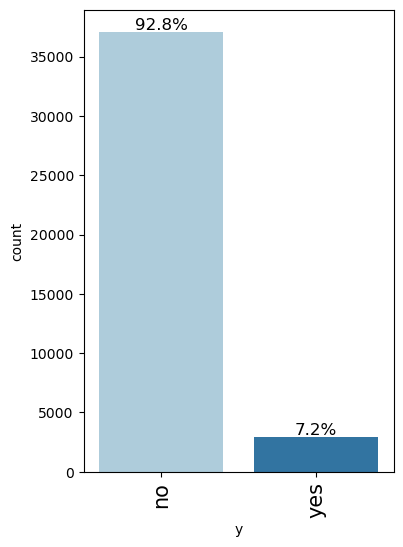

In [20]:
labeled_barplot(data, "y", perc=True)

- The class distribution in the target variable is imbalanced.
- We have 92.8% observations for non-term deposit and 30% observations for term deposit.

### Observation On Age

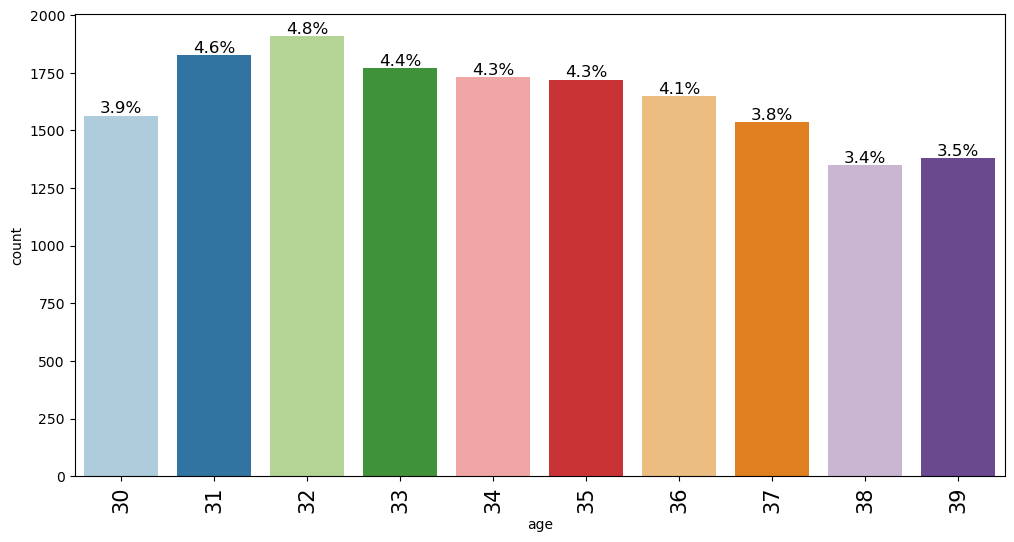

In [21]:
labeled_barplot(data, "age", perc=True, n=10)

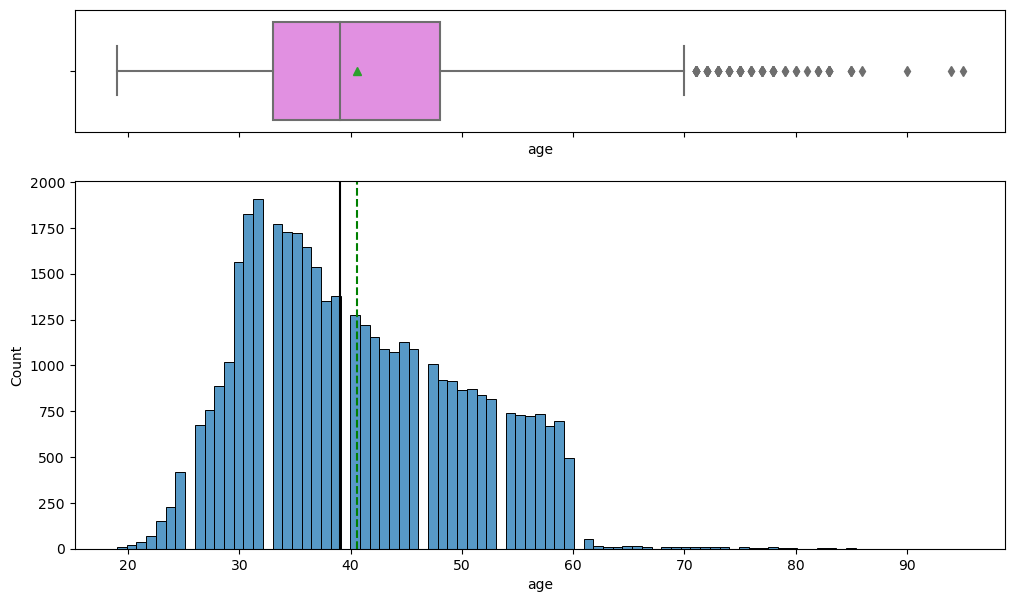

In [22]:
histogram_boxplot(data, "age")

- The distribution of age is right-skewed
- The boxplot shows that there are outliers at the right end
- We will not treat these outliers as they represent the real market trend

### Observation On Job

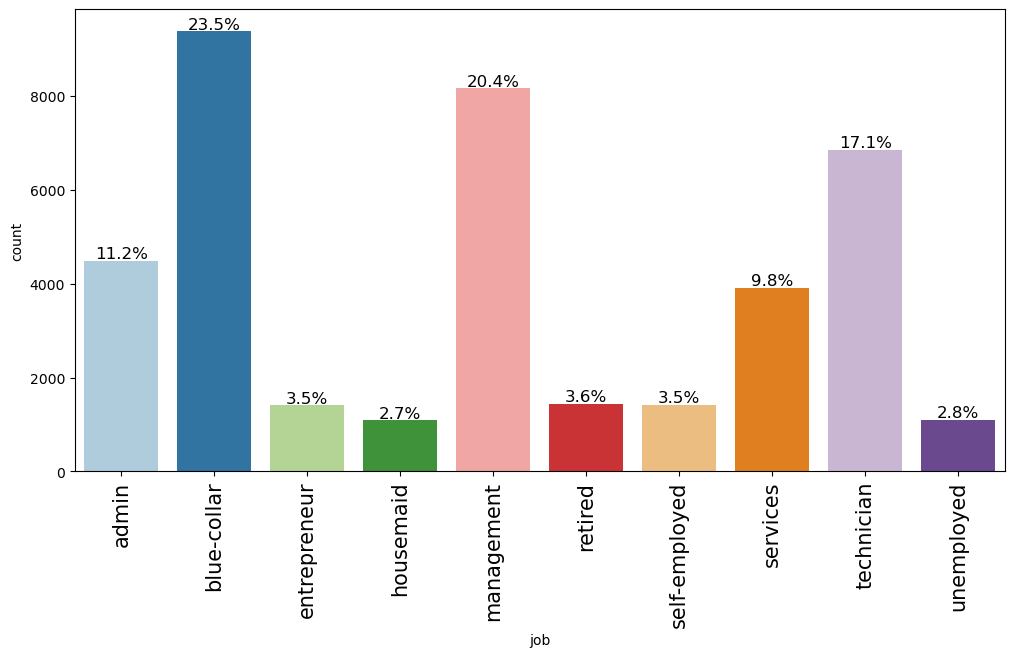

In [23]:
labeled_barplot(data, "job", perc=True, n=10)

* 23.5% of employees are Blue Collar followed by 20% of Management.

### Observation On Marital

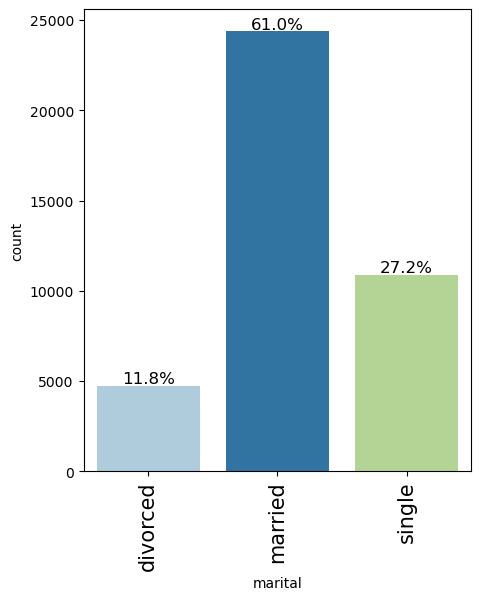

In [24]:
labeled_barplot(data, "marital", perc=True)

* 61% of Customers are married followed by 27.2% of Single and 11.6% Divorced.

### Observation On Education

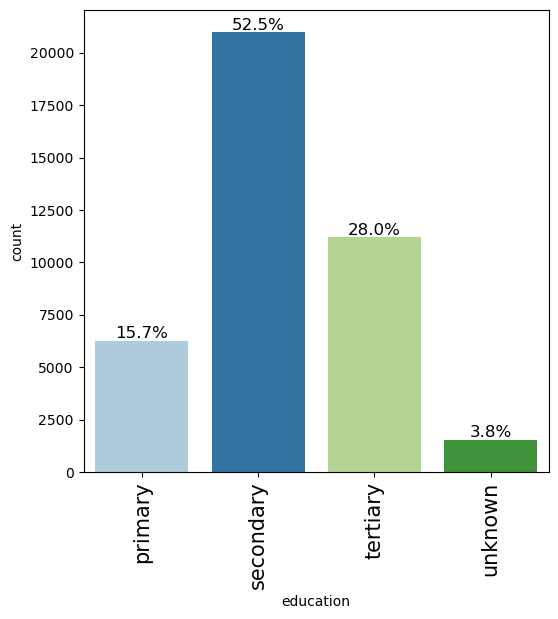

In [25]:
labeled_barplot(data, "education", perc=True)

* 52.5% Customers are having secondary education followed by 28% of teritary education.

### Observation On Default

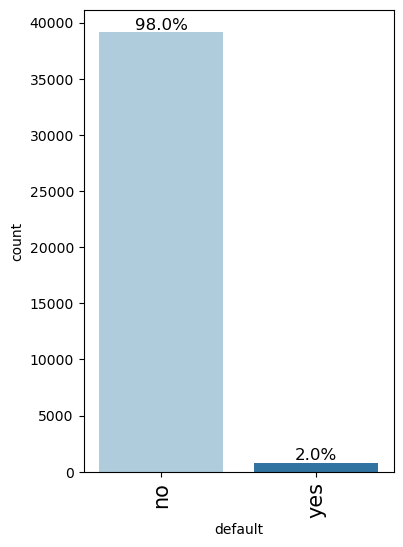

In [26]:
labeled_barplot(data, "default", perc=True)

* 2% of customers are credit in default.

### Observation On Housing

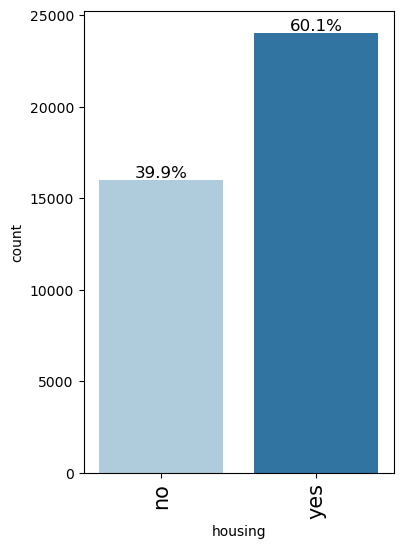

In [27]:
labeled_barplot(data, "housing", perc=True)

* 60.1% of customers are having a housing loan.

### Observation On Loan

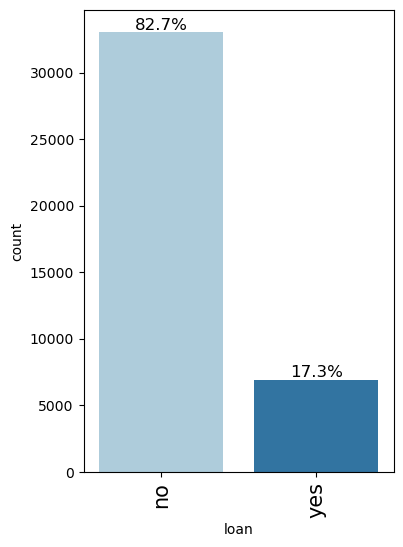

In [28]:
labeled_barplot(data, "loan", perc=True)


* 17.3% of customers are having a personal loan.

### Observation On Contact

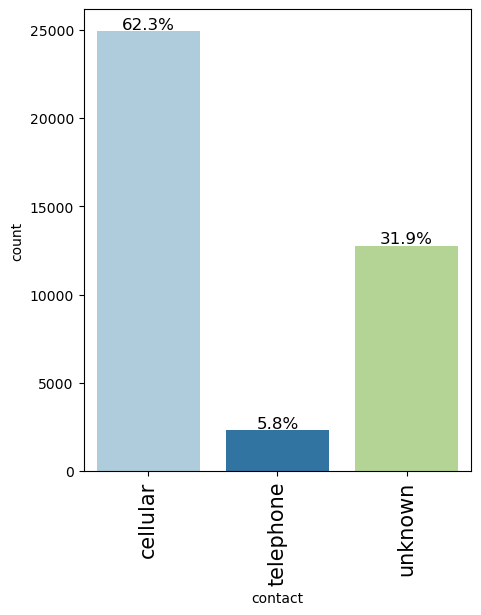

In [29]:
labeled_barplot(data, "contact", perc=True)

* 62.3% of customers contacted by cellular and followed by 31.9% contacted by unknown.

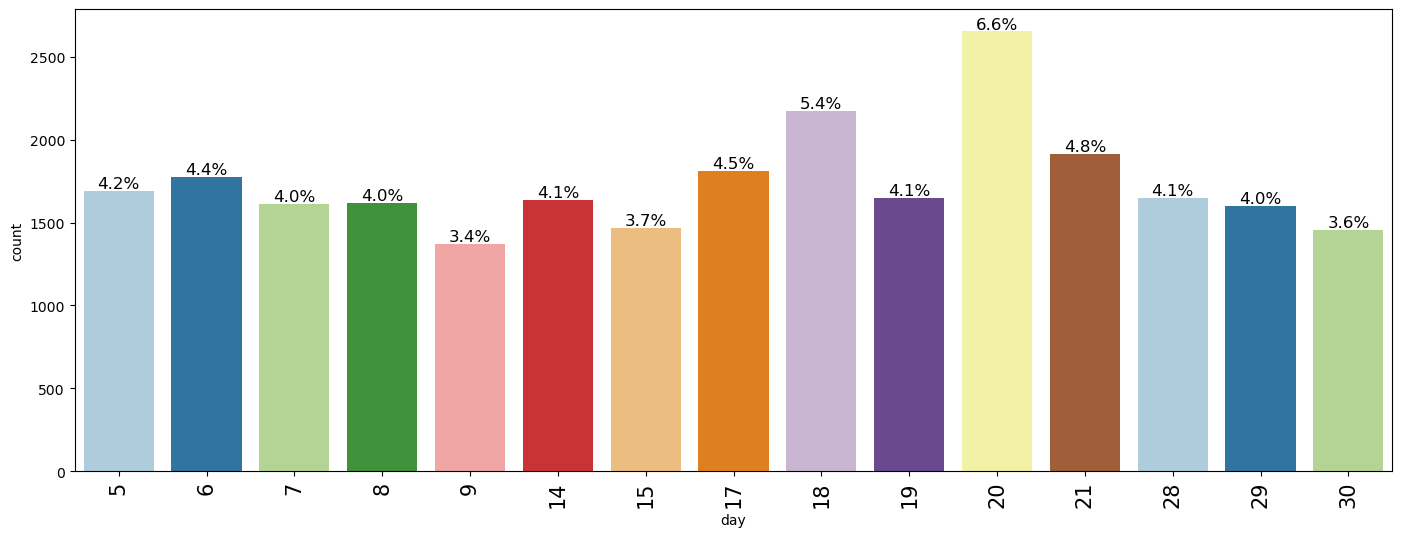

In [30]:
labeled_barplot(data, "day", perc=True, n=15)

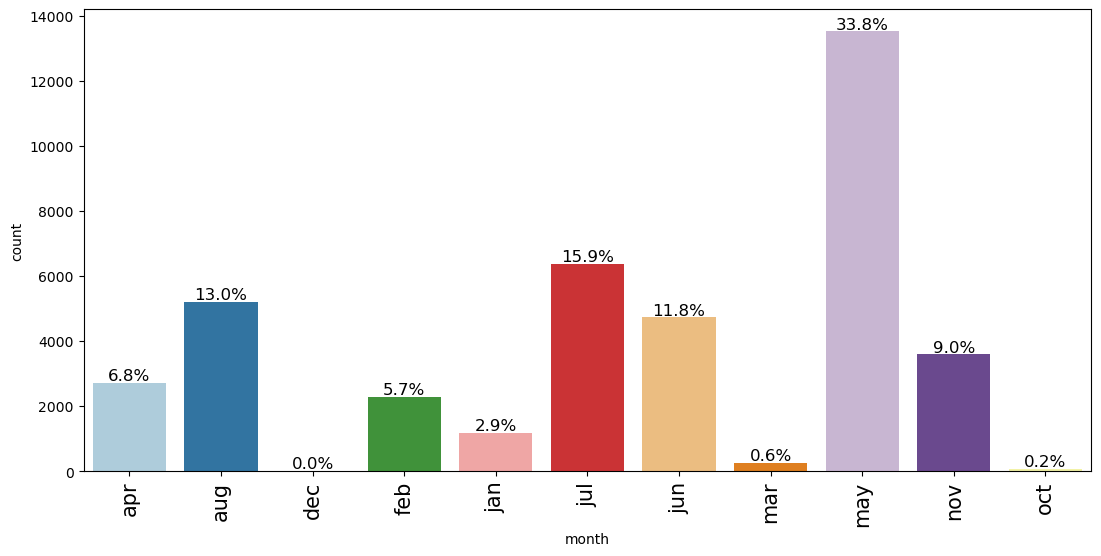

In [31]:
labeled_barplot(data, "month", perc=True)

* 33.8% of customers were last contact month of year which is in the month of may.

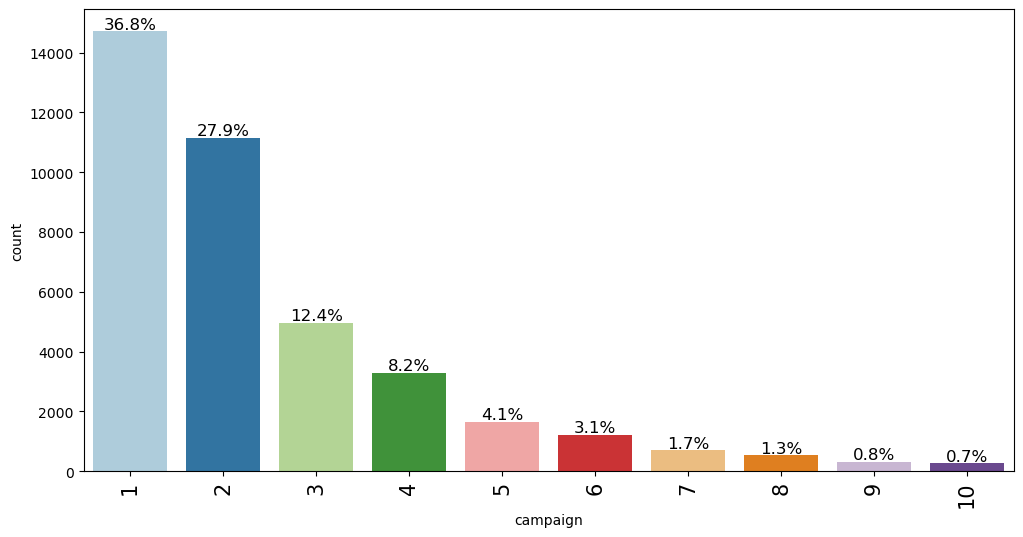

In [32]:
labeled_barplot(data, "campaign", perc=True, n=10)

* 36.8% number of contacts performed during this first campaign followed by 27.9% in second campaign.


### Replace NaN Values with Zeros 

In [33]:
data.replace(np.nan, 0)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


## Bivariate Analysis

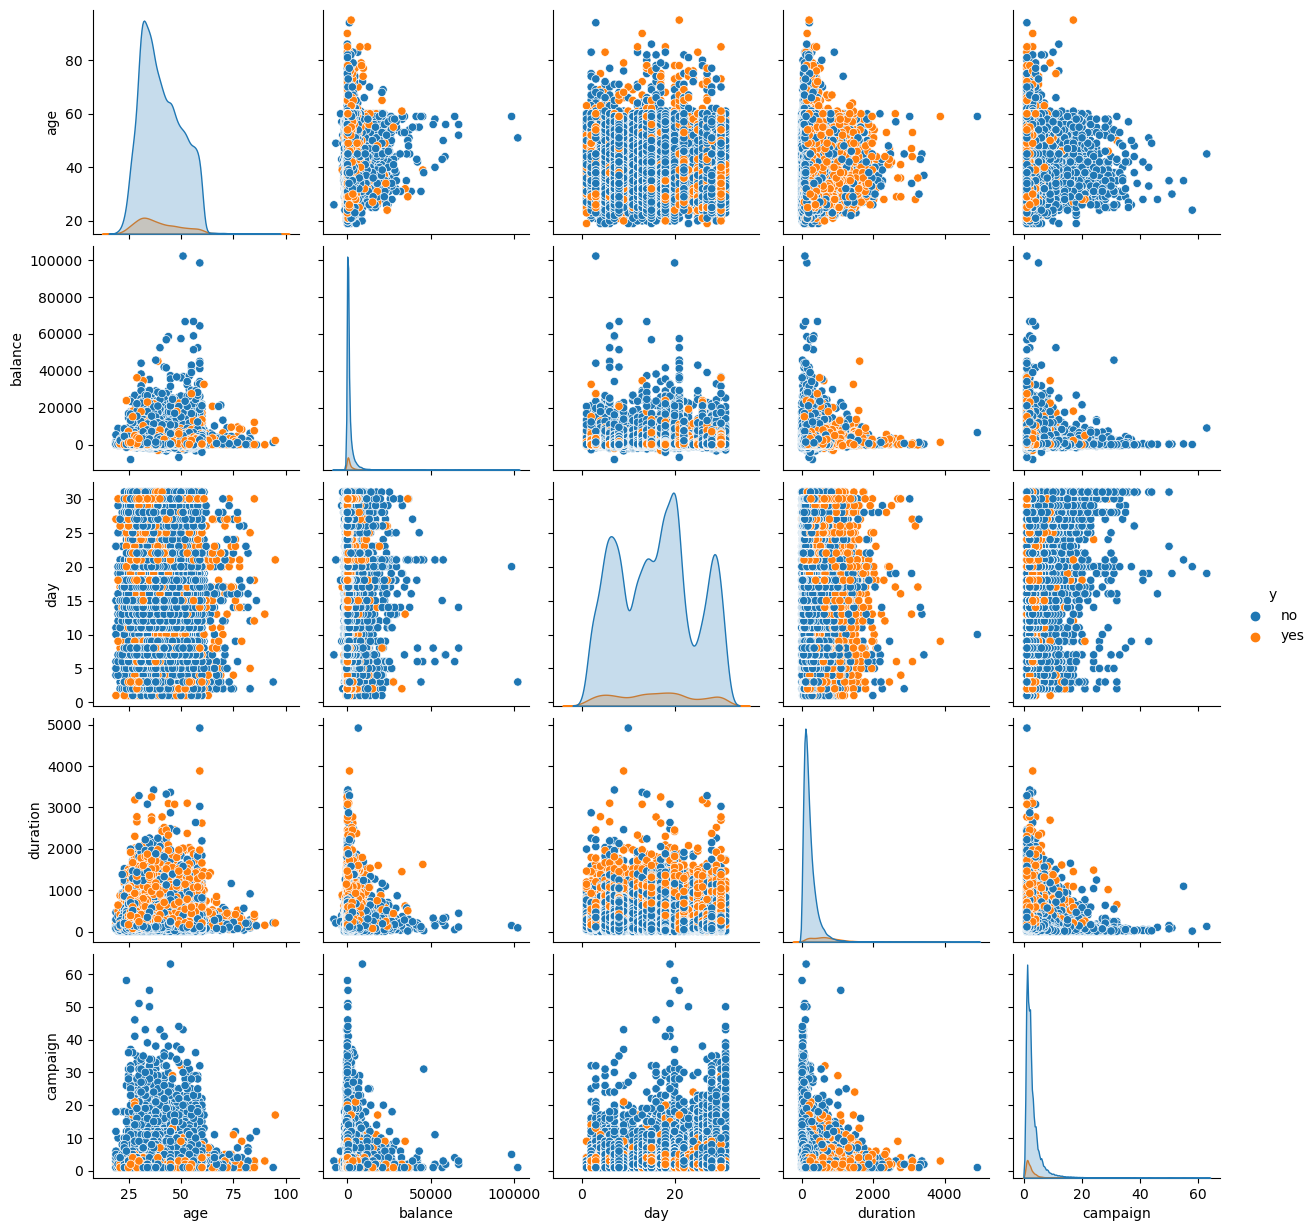

In [34]:
sns.pairplot(data, hue="y")
plt.show()

- There are overlaps i.e. no clear distinction in the distribution of variables for customers who have subscribed to a term deposit. (binary)
- Let's explore this further with the help of other plots.

In [35]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Target Variable y vs Age

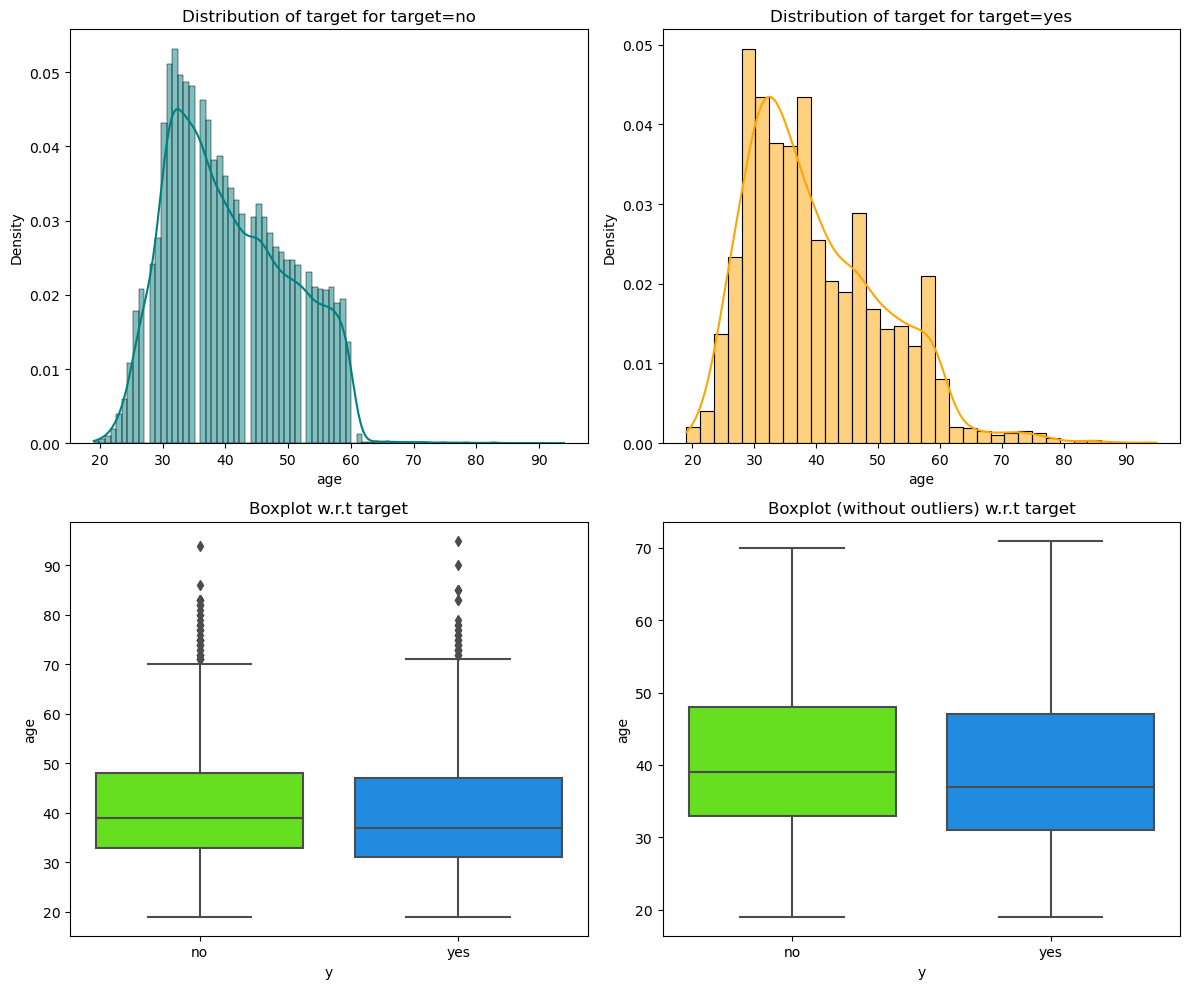

In [36]:
distribution_plot_wrt_target(data, "age", "y")

- We can see that the median age of the customers subscribed to a term deposit is less than the median age of the customer not subscribed to a term deposit
- This shows that younger customers are more likely subscribe to a term deposit.
- There are outliers in boxplots of both class distributions


### Target Variable y vs Balance

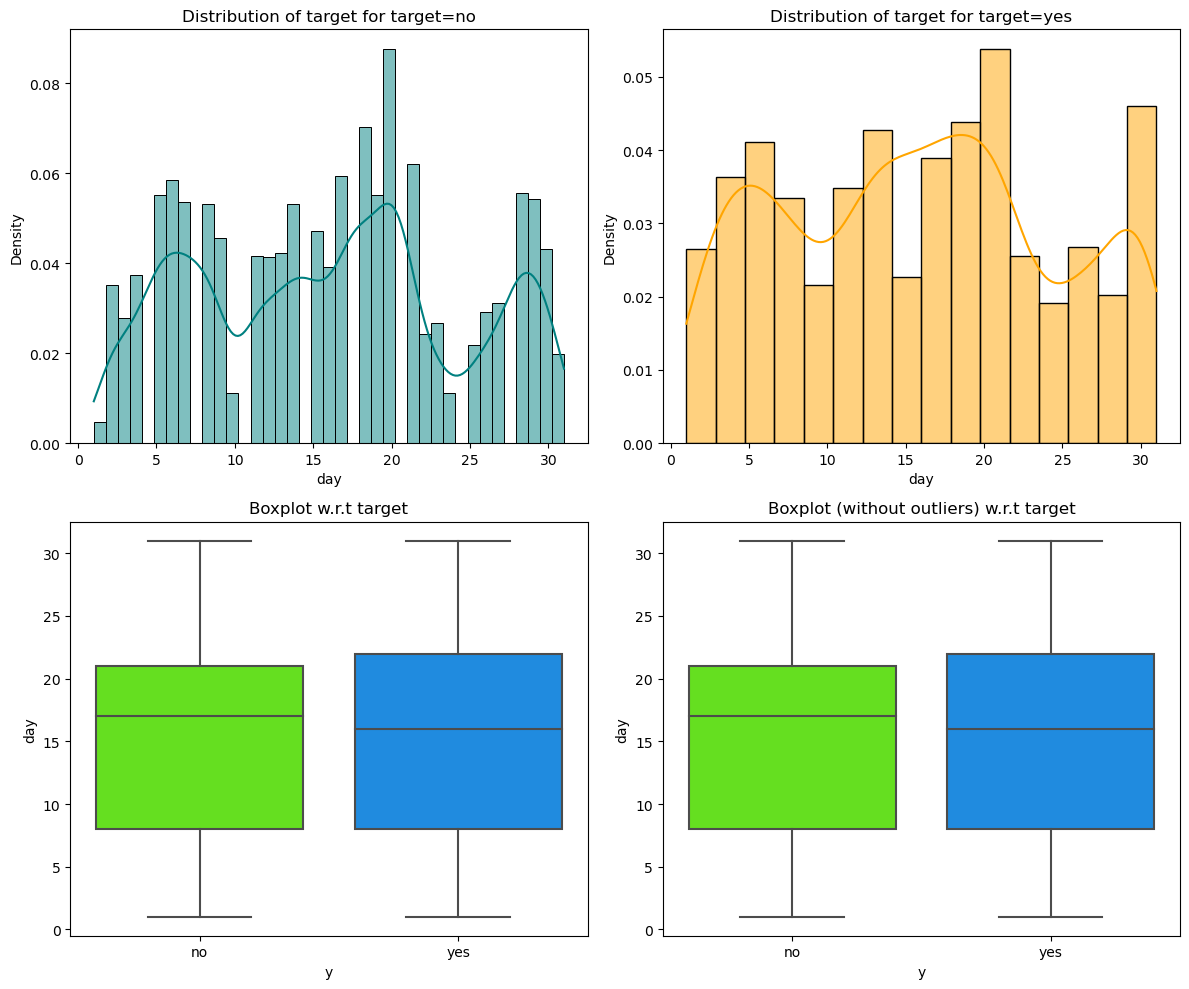

In [37]:
distribution_plot_wrt_target(data, "day", "y")

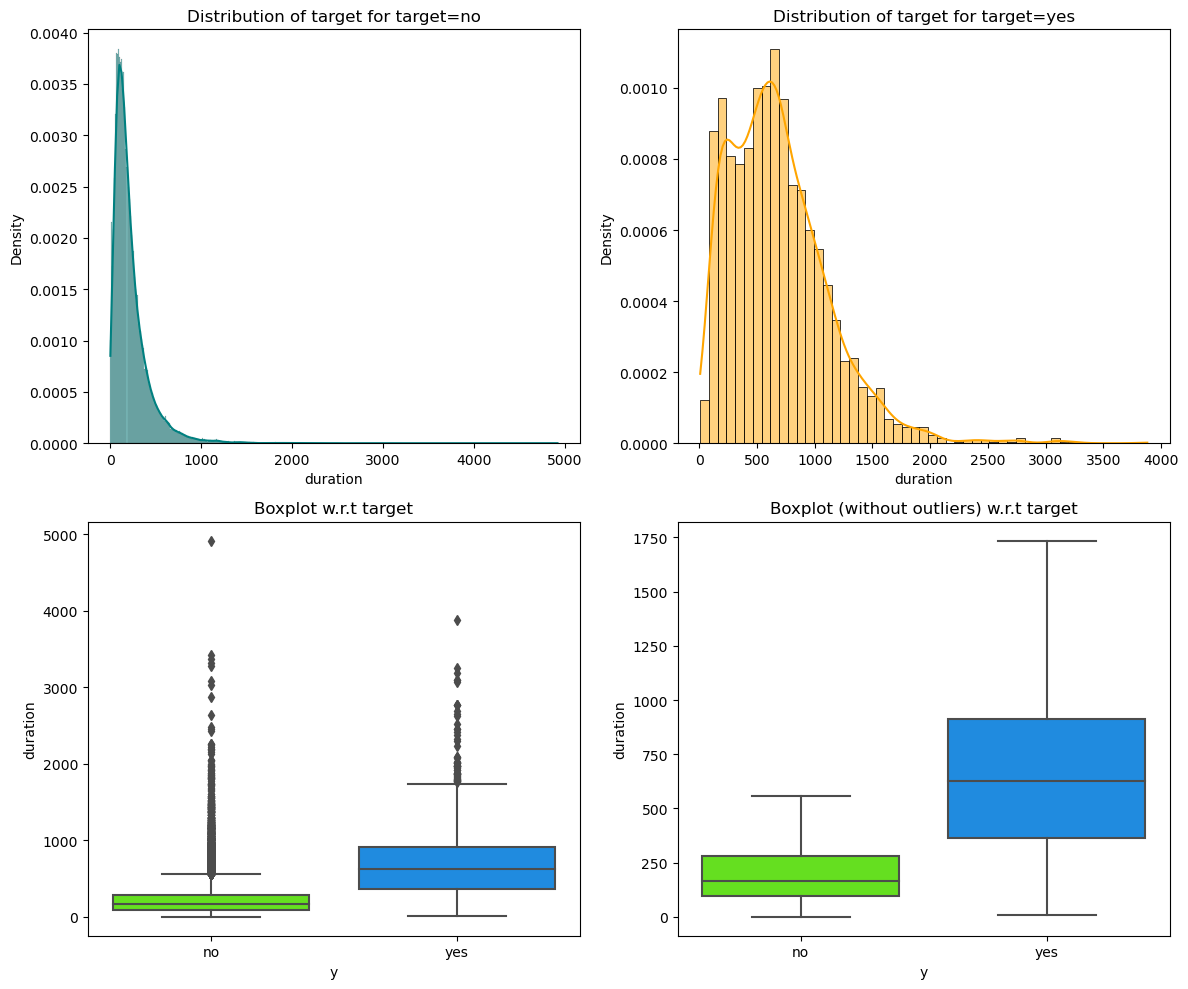

In [38]:
distribution_plot_wrt_target(data, "duration", "y")

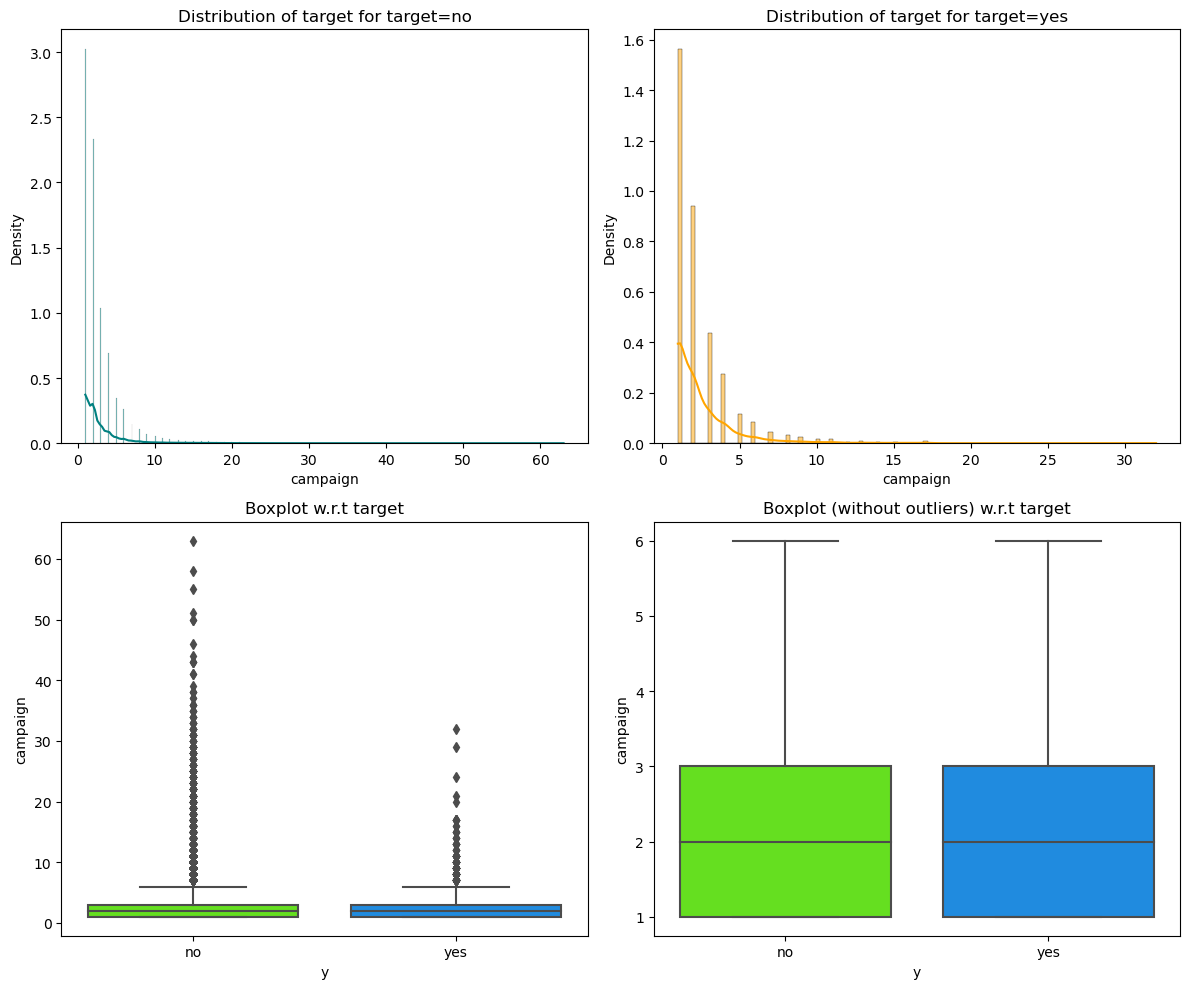

In [39]:
distribution_plot_wrt_target(data, "campaign", "y")

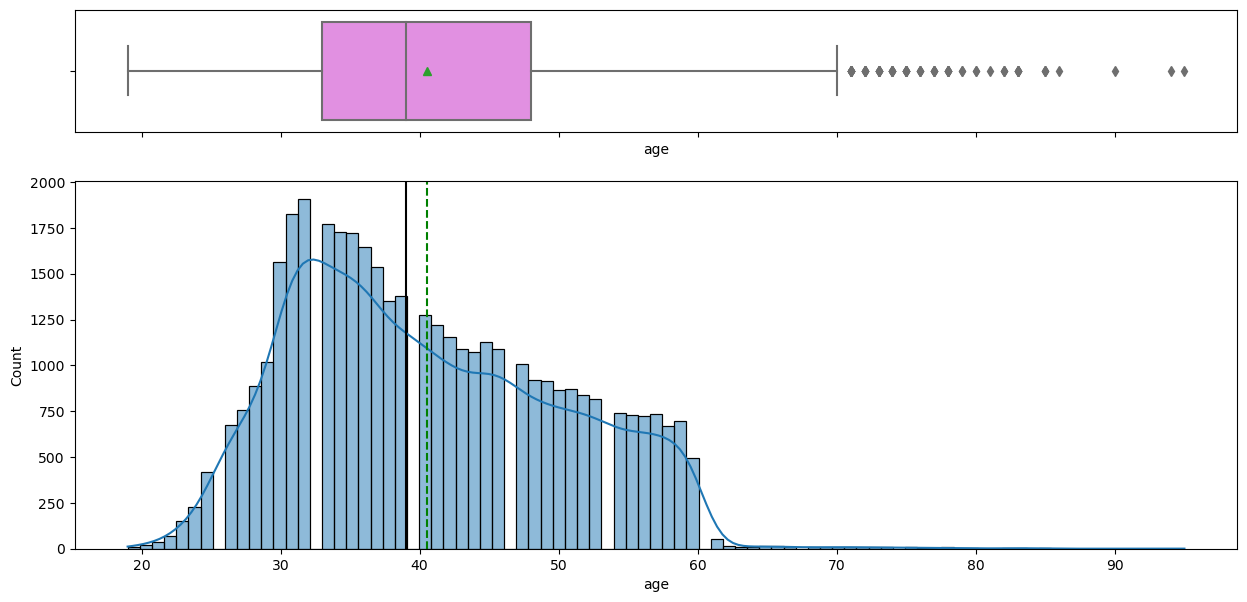

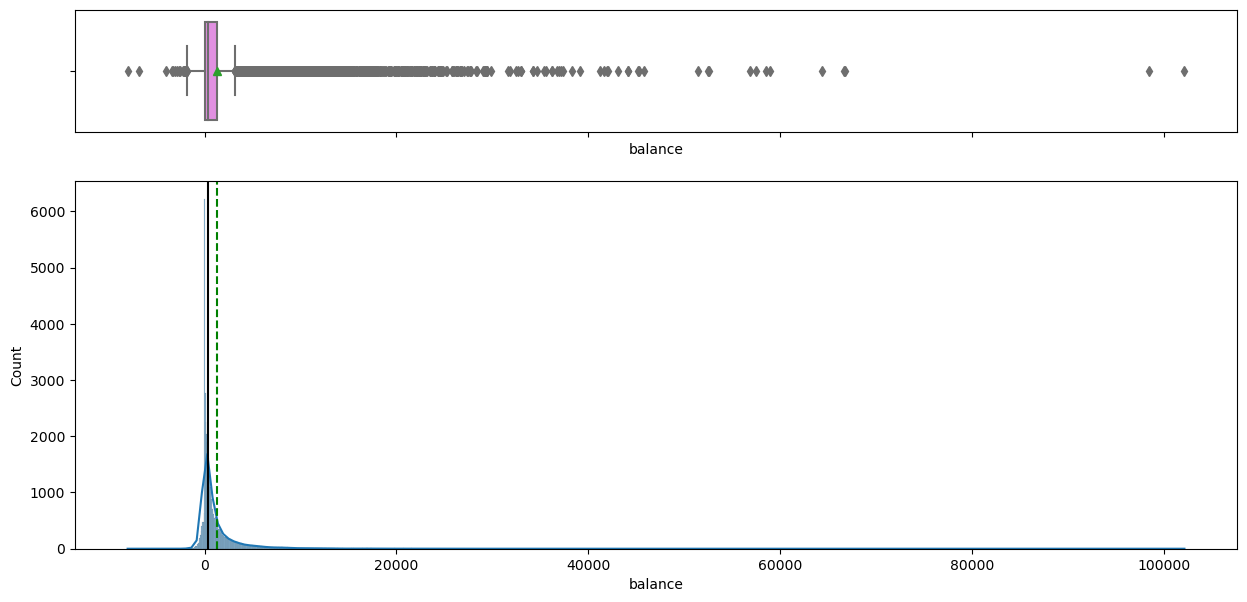

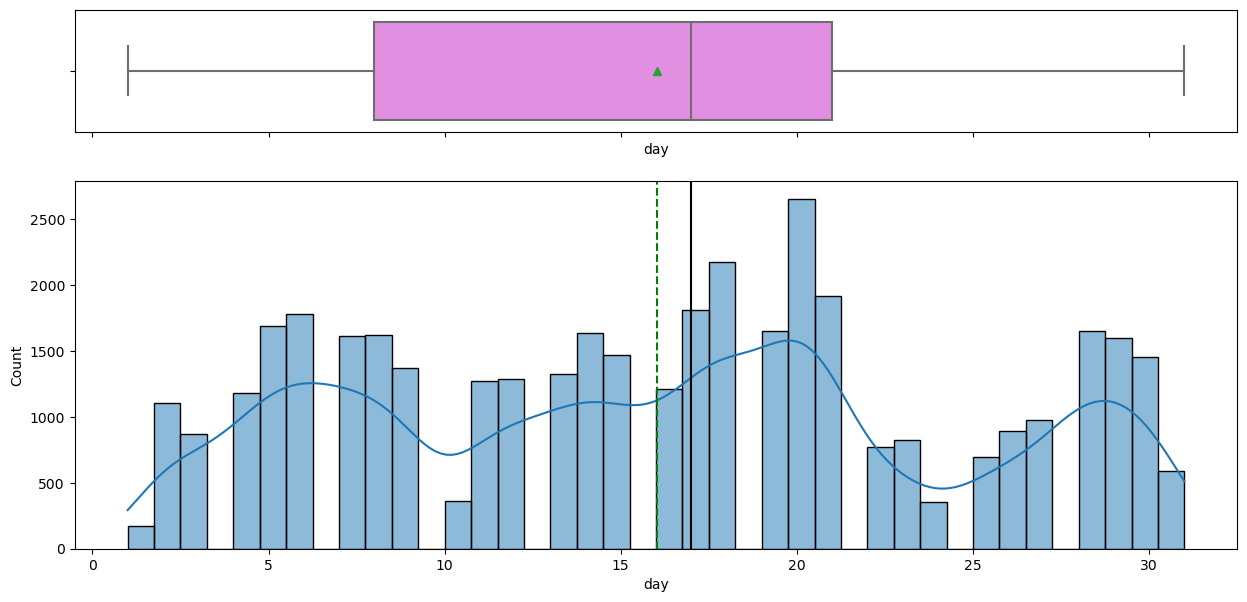

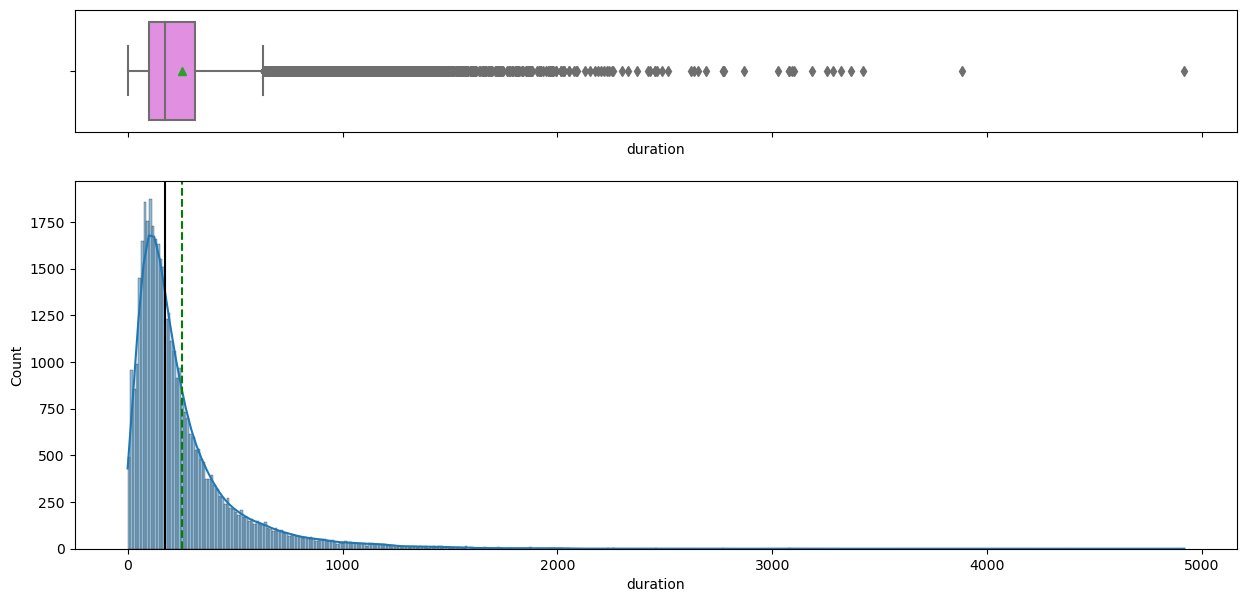

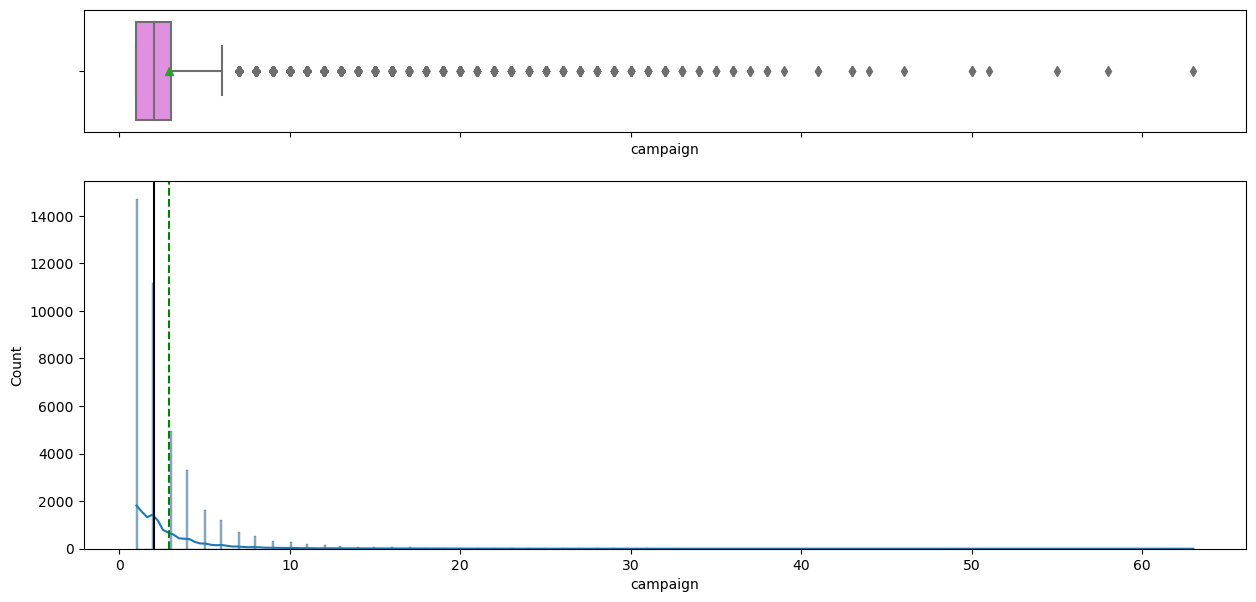

In [40]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(data, item, kde=True, figsize=(15, 7))

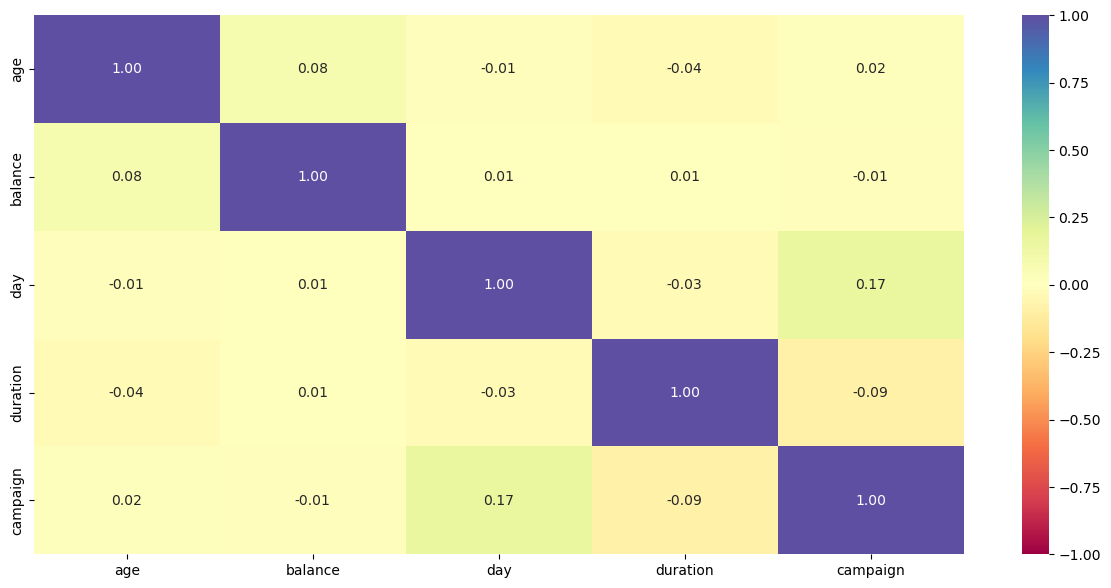

In [41]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There is no significant correlation between the columns.

In [42]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [43]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

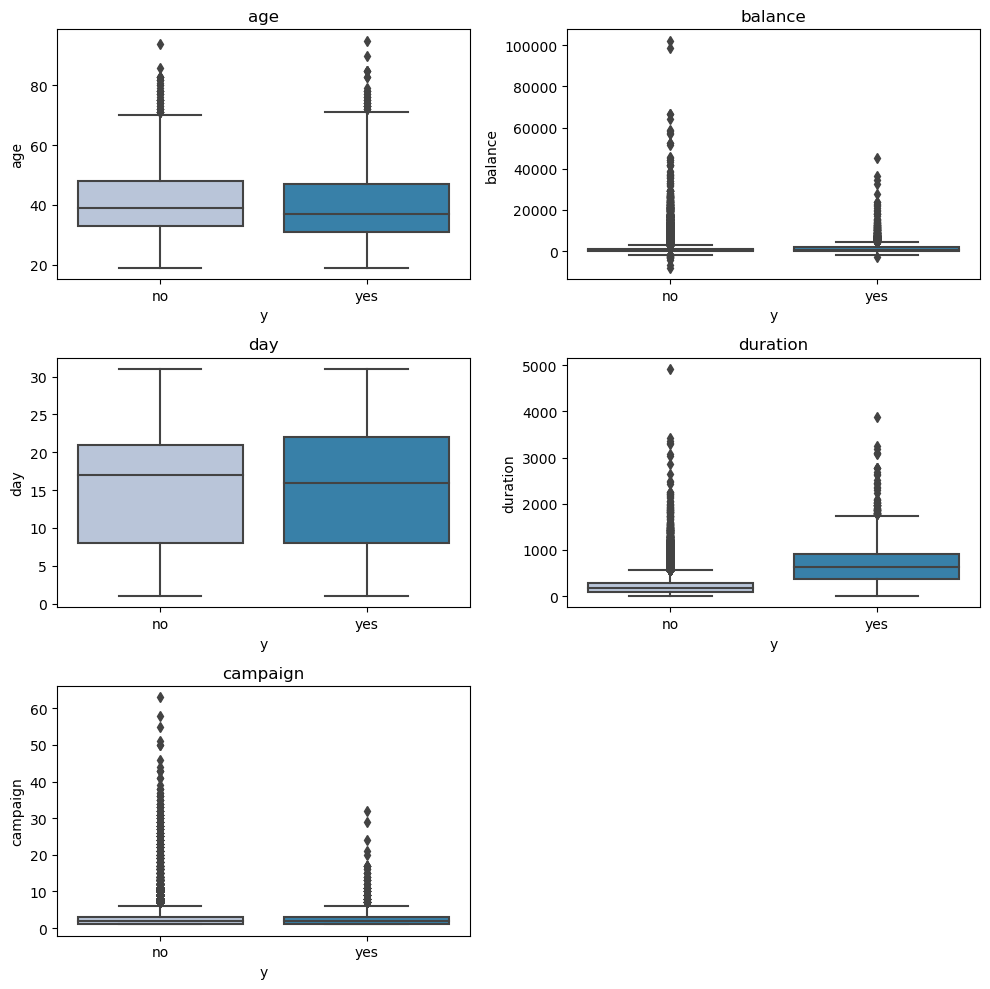

In [44]:
cols = data[["age", "balance", "day", "duration", "campaign"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=data["y"], y=data[variable], palette="PuBu")
    # sns.barplot(x=data.values, y=data.index, alpha=0.8)
    plt.tight_layout()
    plt.title(variable)

y            no   yes    All
marital                     
All       37104  2896  40000
married   22908  1478  24386
single     9862  1027  10889
divorced   4334   391   4725
------------------------------------------------------------------------------------------------------------------------


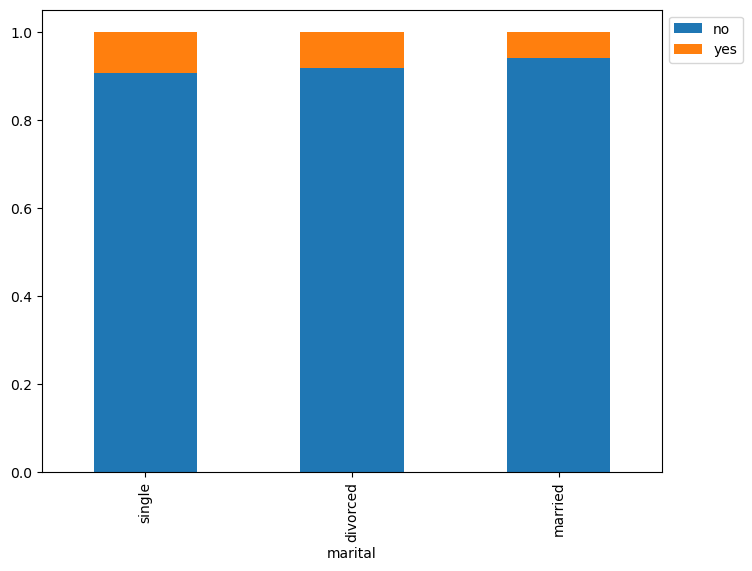

In [45]:
stacked_barplot(data, "marital", "y")

In [46]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

y                 no   yes    All
job                              
All            37104  2896  40000
management      7490   676   8166
blue-collar     8848   535   9383
technician      6355   497   6852
admin           4132   351   4483
services        3672   238   3910
retired         1286   151   1437
self-employed   1302   112   1414
unemployed      1008    96   1104
entrepreneur    1317    88   1405
student          442    82    524
housemaid       1034    53   1087
unknown          218    17    235
------------------------------------------------------------------------------------------------------------------------


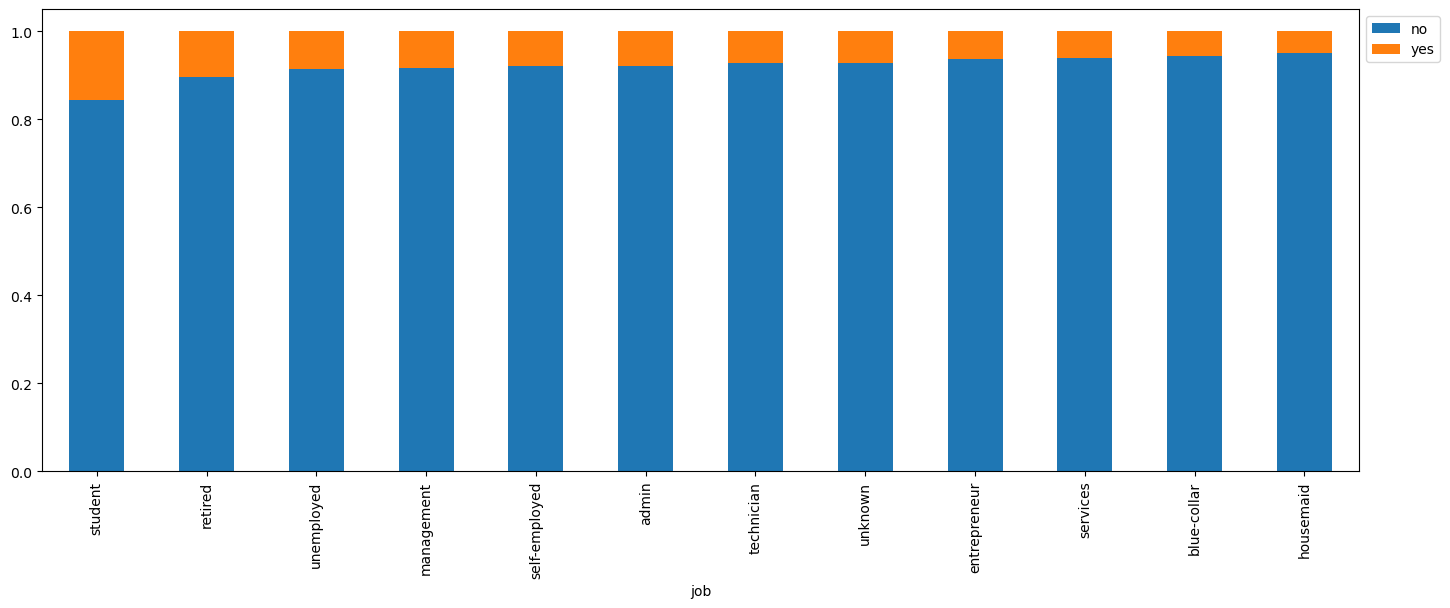

In [47]:
stacked_barplot(data, "job", "y")

y             no   yes    All
education                    
All        37104  2896  40000
secondary  19575  1418  20993
tertiary   10177  1029  11206
primary     5917   353   6270
unknown     1435    96   1531
------------------------------------------------------------------------------------------------------------------------


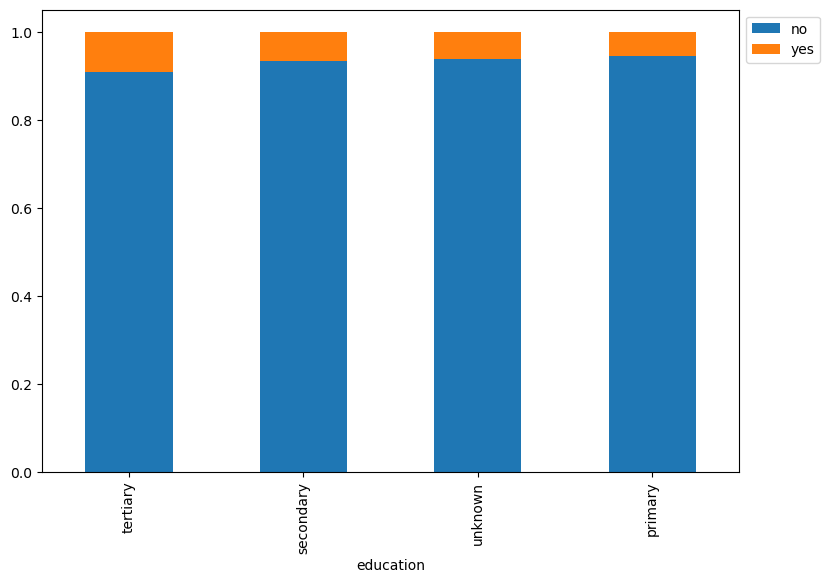

In [48]:
stacked_barplot(data, "education", "y")

y           no   yes    All
default                    
All      37104  2896  40000
no       36344  2847  39191
yes        760    49    809
------------------------------------------------------------------------------------------------------------------------


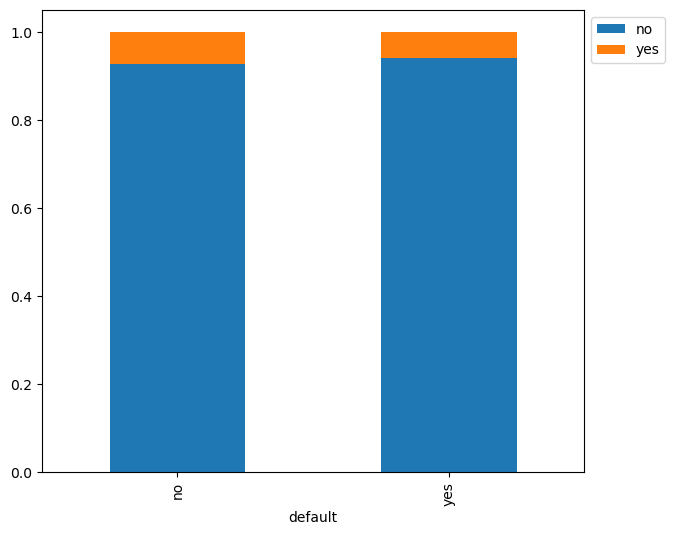

In [49]:
stacked_barplot(data, "default", "y")

y        no   yes    All
loan                    
All   37104  2896  40000
no    30554  2516  33070
yes    6550   380   6930
------------------------------------------------------------------------------------------------------------------------


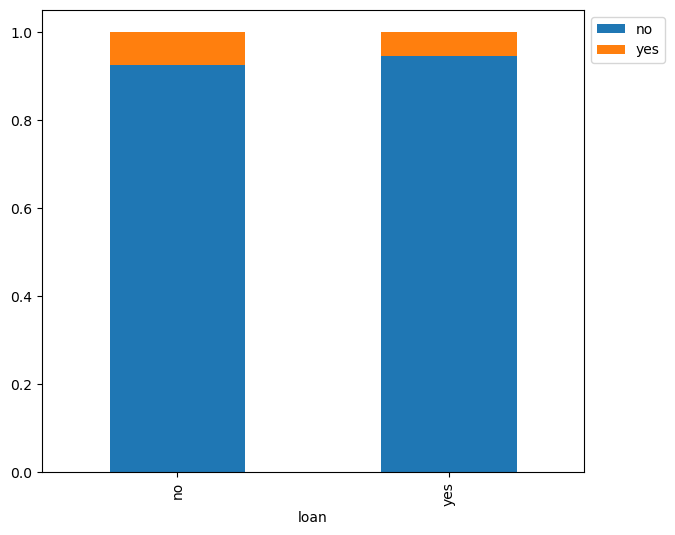

In [50]:
stacked_barplot(data, "loan", "y")

y           no   yes    All
housing                    
All      37104  2896  40000
yes      22567  1464  24031
no       14537  1432  15969
------------------------------------------------------------------------------------------------------------------------


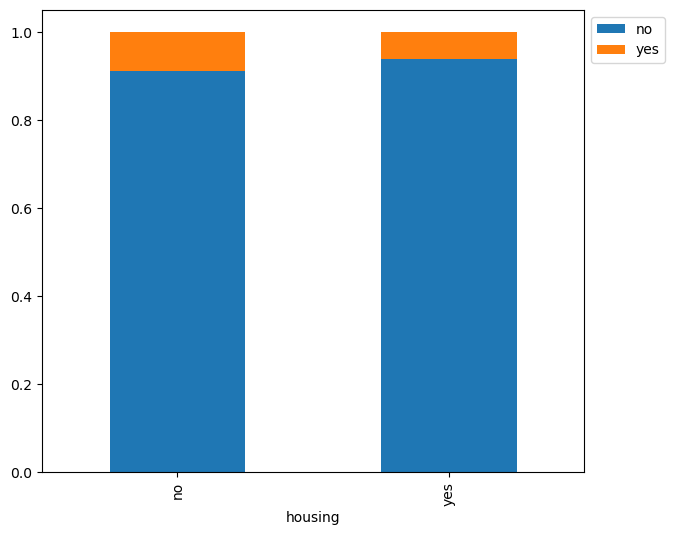

In [51]:
stacked_barplot(data, "housing", "y")

y             no   yes    All
contact                      
All        37104  2896  40000
cellular   22681  2233  24914
unknown    12268   497  12765
telephone   2155   166   2321
------------------------------------------------------------------------------------------------------------------------


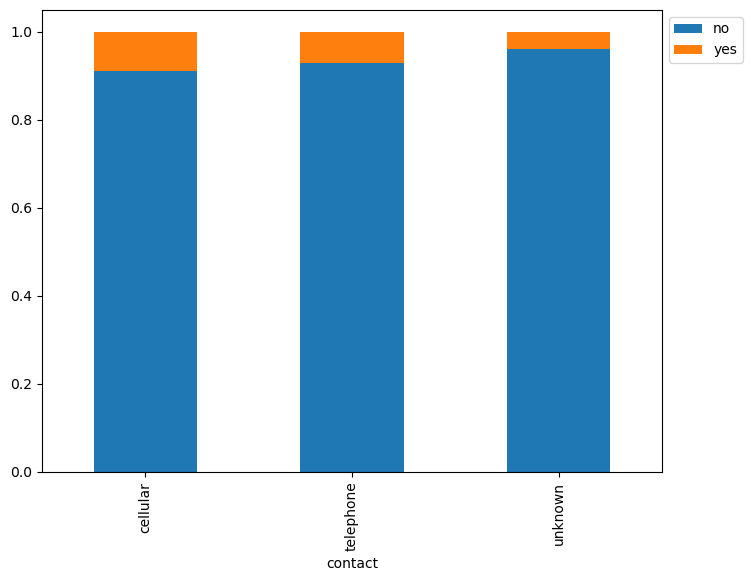

In [52]:
stacked_barplot(data, "contact", "y")

y       no   yes    All
day                    
All  37104  2896  40000
30    1233   224   1457
18    2008   165   2173
20    2502   153   2655
21    1775   139   1914
15    1345   123   1468
13    1208   117   1325
4     1066   117   1183
14    1521   115   1636
17    1697   115   1812
5     1578   113   1691
6     1668   110   1778
2     1005   104   1109
12    1185   104   1289
8     1518   102   1620
16    1119    96   1215
11    1187    85   1272
27     890    84    974
3      794    80    874
22     693    80    773
7     1532    80   1612
19    1577    73   1650
25     623    72    695
9     1302    72   1374
26     834    61    895
28    1589    61   1650
23     764    59    823
29    1551    49   1600
10     319    45    364
1      136    40    176
24     320    32    352
31     565    26    591
------------------------------------------------------------------------------------------------------------------------


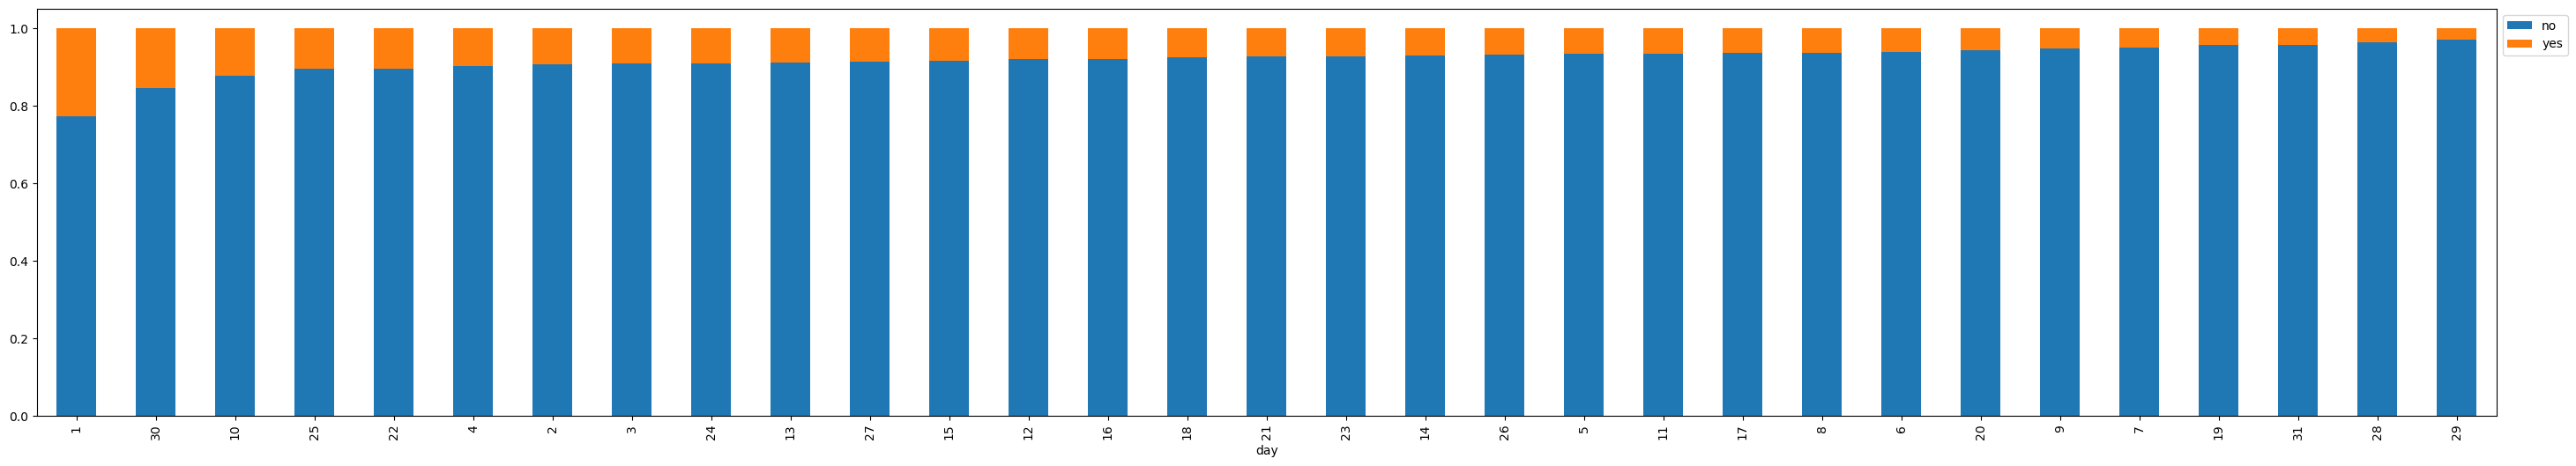

In [53]:
stacked_barplot(data, "day", "y")

y         no   yes    All
month                    
All    37104  2896  40000
may    12741   791  13532
apr     2267   451   2718
jul     5996   384   6380
jun     4440   294   4734
aug     4927   288   5215
feb     2041   255   2296
nov     3378   220   3598
mar      133   125    258
oct       31    49     80
jan     1138    38   1176
dec       12     1     13
------------------------------------------------------------------------------------------------------------------------


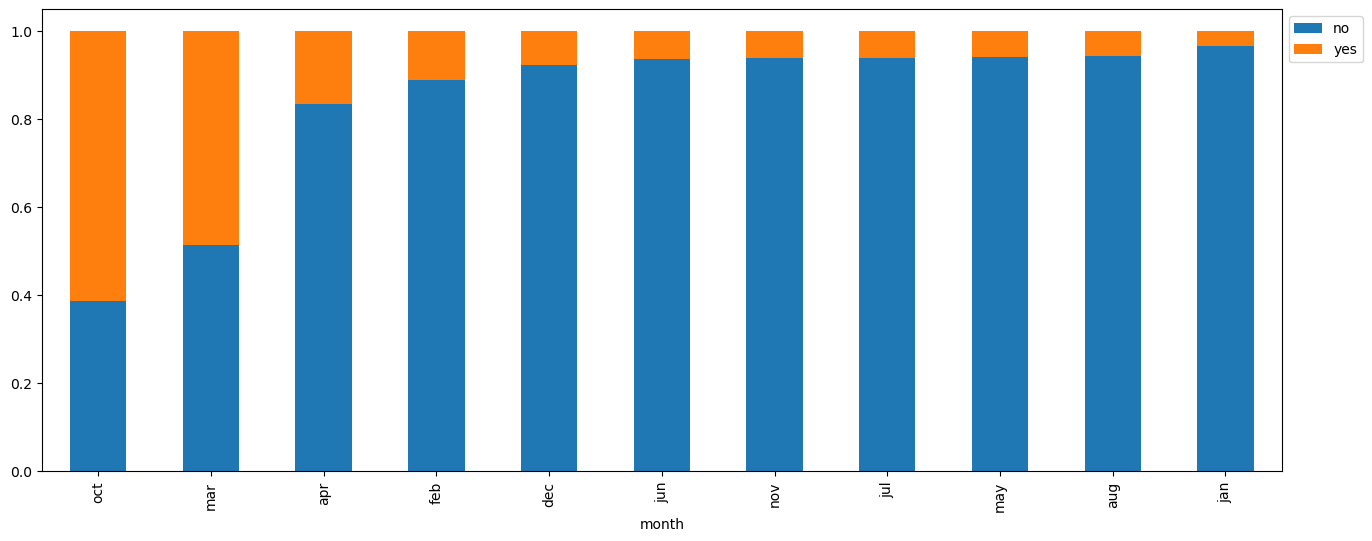

In [54]:
stacked_barplot(data, "month", "y")

## Data Preprocessing

### Outlier Detection

- Let's look at outliers in every numerical column

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  int64   
 1   job        40000 non-null  category
 2   marital    40000 non-null  category
 3   education  40000 non-null  category
 4   default    40000 non-null  category
 5   balance    40000 non-null  int64   
 6   housing    40000 non-null  category
 7   loan       40000 non-null  category
 8   contact    40000 non-null  category
 9   day        40000 non-null  int64   
 10  month      40000 non-null  category
 11  duration   40000 non-null  int64   
 12  campaign   40000 non-null  int64   
 13  y          40000 non-null  category
dtypes: category(9), int64(5)
memory usage: 1.9 MB


In [56]:
data1 = data.copy()

In [57]:
data1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [58]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  int64   
 1   job        40000 non-null  category
 2   marital    40000 non-null  category
 3   education  40000 non-null  category
 4   default    40000 non-null  category
 5   balance    40000 non-null  int64   
 6   housing    40000 non-null  category
 7   loan       40000 non-null  category
 8   contact    40000 non-null  category
 9   day        40000 non-null  int64   
 10  month      40000 non-null  category
 11  duration   40000 non-null  int64   
 12  campaign   40000 non-null  int64   
 13  y          40000 non-null  category
dtypes: category(9), int64(5)
memory usage: 1.9 MB


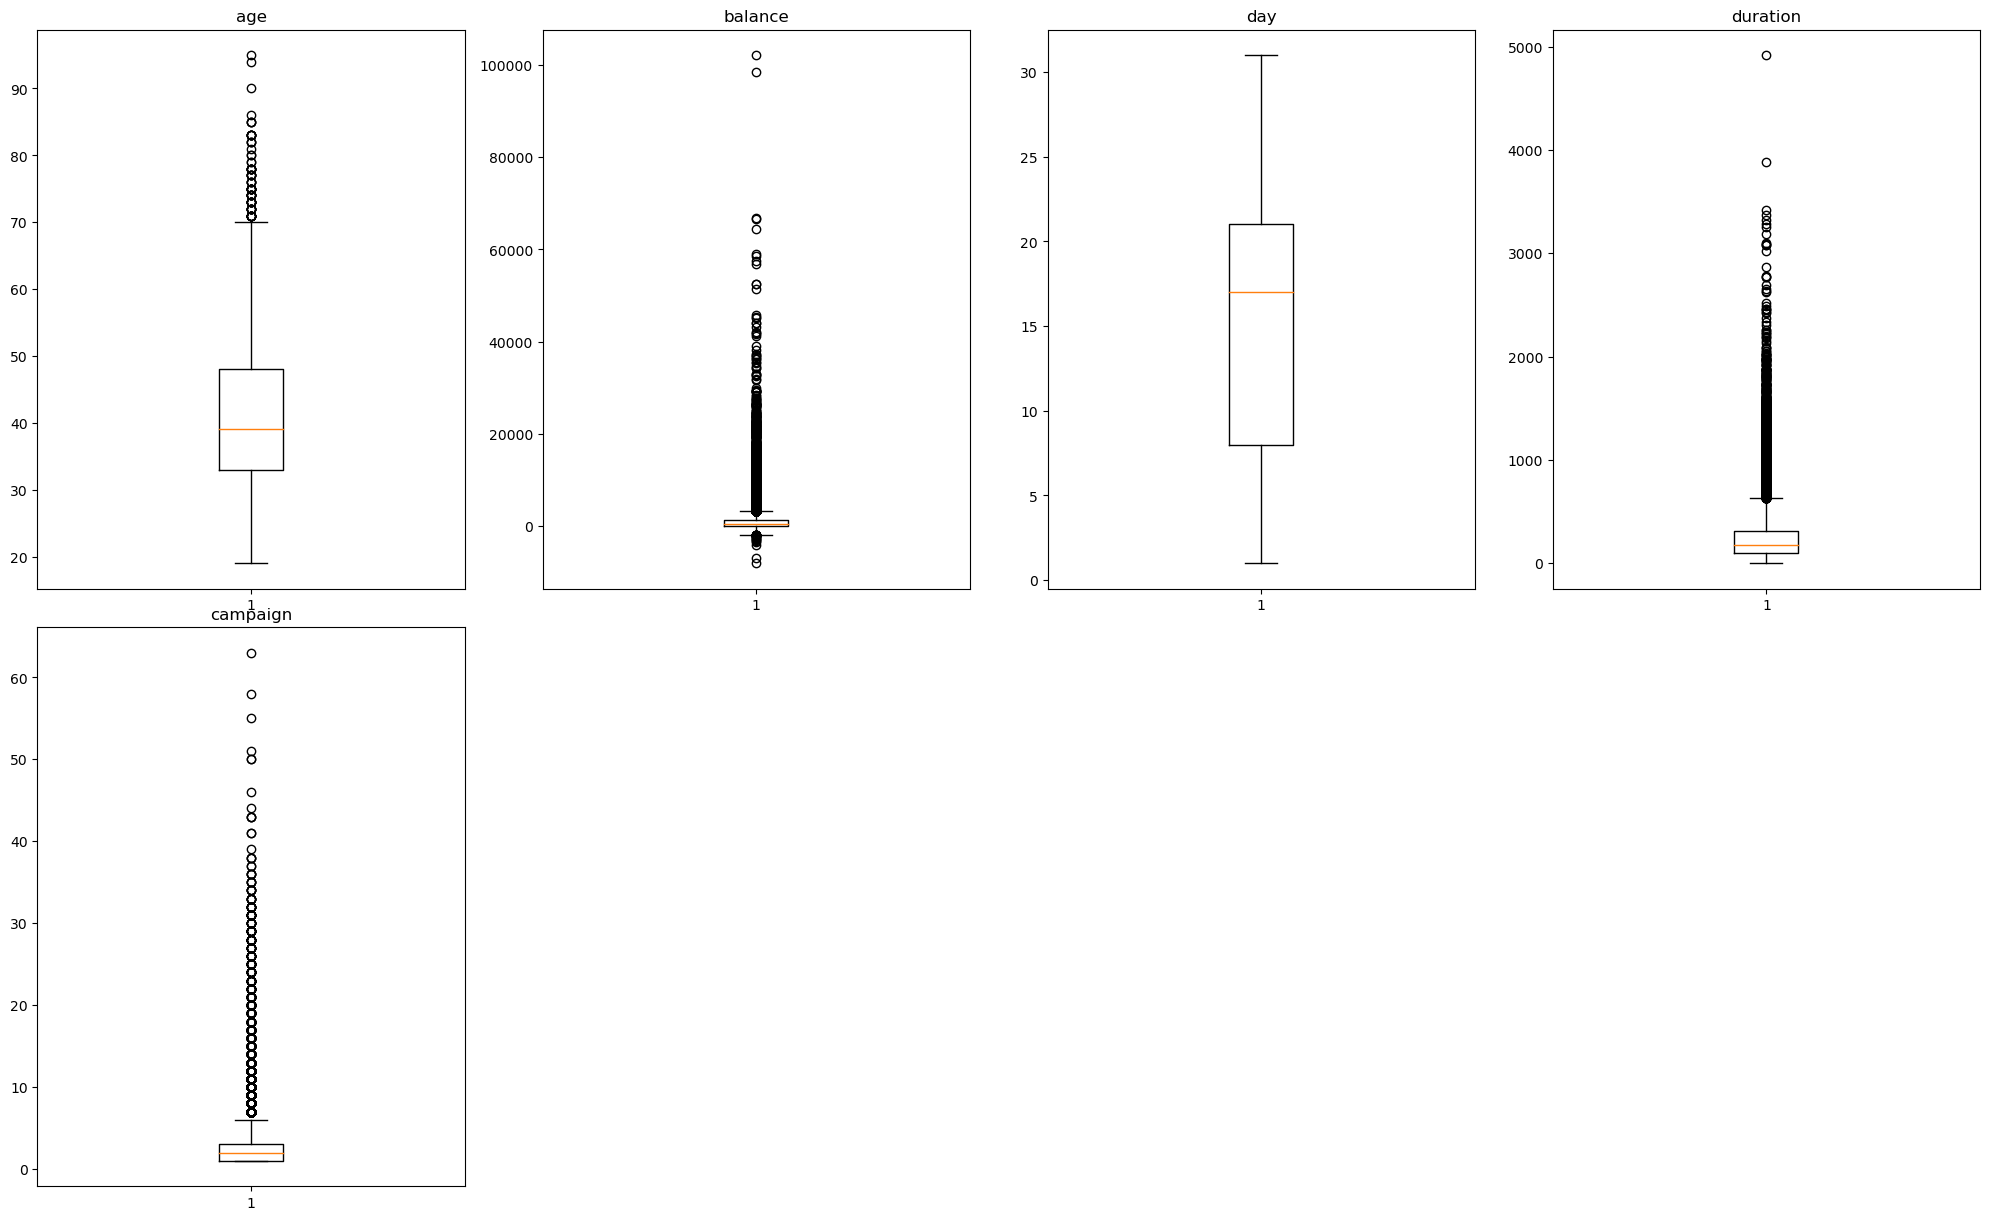

In [59]:
# outlier detection using boxplot
numeric_columns = data1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations

There are lower outliers in screen_size.

We will treat these outliers as these might adversely affect the predictive power of linear model. However, in real life, these outliers may be due to non-linear pattern in the data or can be important information.

Sometimes outliers in the independent variable can adversely impact the linear model. This can be checked by building the model with and without outliers and comparing the model performances.

### Outlier Treatment

- Let's treat outliers in the data by flooring and capping.

In [60]:
def treat_outliers(data1, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = data1[col].quantile(0.25)  # 25th quantile
    Q3 = data1[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    data1[col] = np.clip(data1[col], Lower_Whisker, Upper_Whisker)

    return data1


def treat_outliers_all(data1, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        data1 = treat_outliers(data1, c)

    return data1

In [61]:
# treating the outliers
numerical_col = data1.select_dtypes(include=np.number).columns.tolist()
data1 = treat_outliers_all(data1, numerical_col)

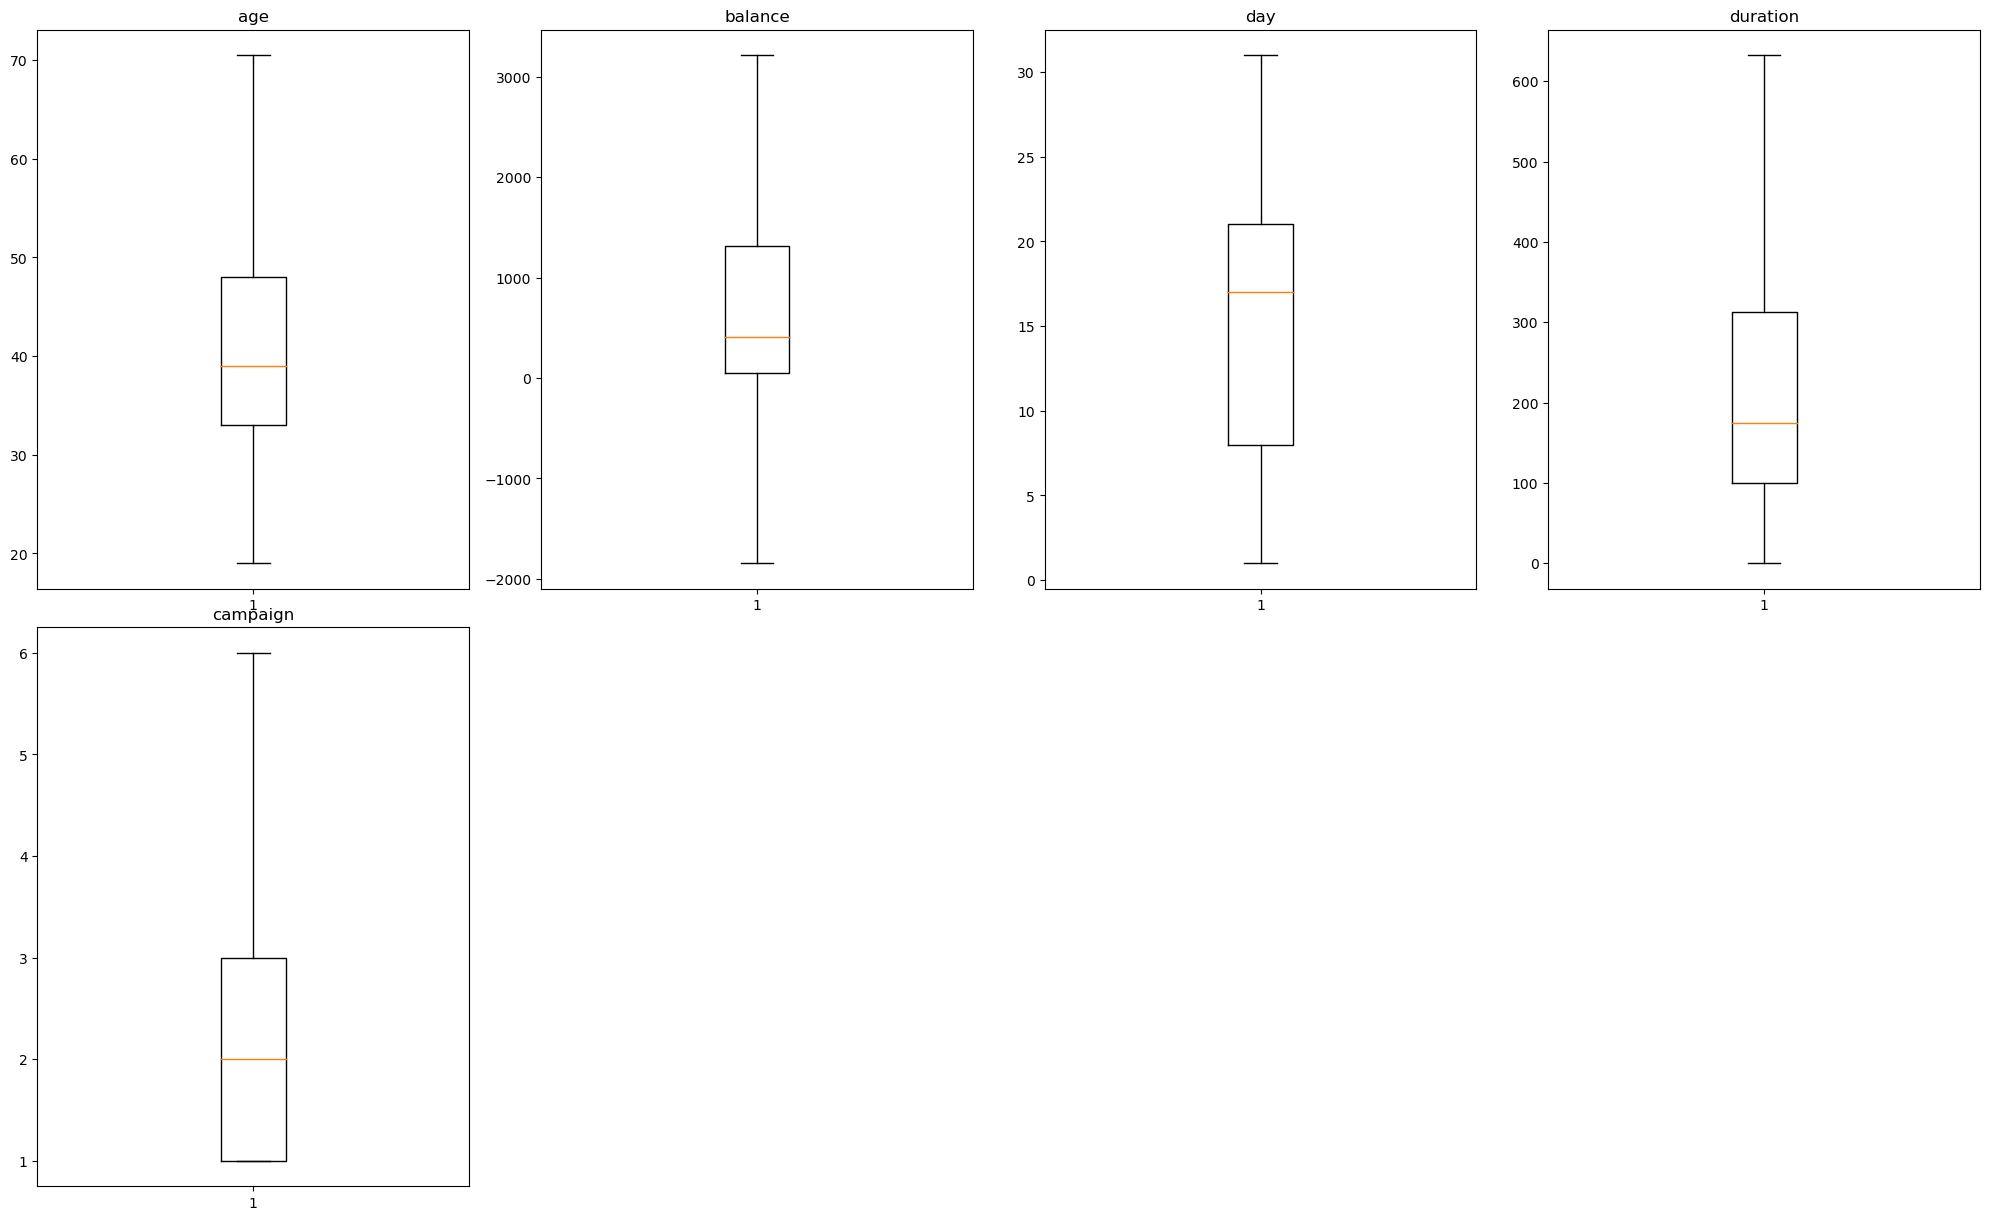

In [62]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))
# dropping release_year as it is a temporal variable

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will subscribe to a term deposit but in reality, the customer is not subscribe to a term deposit - Loss of resources
2. Predicting a customer will not subscribe to a term deposit but in reality, the customer is subscribe to a term deposit - Loss of opportunity


#### Which case is more important? 
* Predicting a customer is not looking for a term deposit but the customer is looking for a term deposit i.e Losing a potential customer the customer will not be targeted by the  Bank Institution  when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company would want Recall to be maximized, greater the Recall lesser the chances of false negatives.


#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_recall_score function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

In [63]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [64]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [65]:
replaceStruct = {
    "job": {
        "unknown": -1,
        "blue-collar": 1,
        "management": 2,
        "technician": 3,
        "admin.": 4,
        "services": 5,
        "retired": 6,
        "self-employed": 7,
        "entrepreneur": 8,
        "unemployed": 9,
        "housemaid": 10,
        "student": 11,
    },
    "marital": {"single": 1, "married": 2, "divorced": 3},
    "education": {"unknown": -1, "primary": 1, "secondary": 2, "tertiary": 3},
    "default": {"no": 0, "yes": 1},
    "housing": {"no": 0, "yes": 1},
    "loan": {"no": 0, "yes": 1},
    "contact": {"unknown": -1, "cellular": 1, "telephone": 2},
    "y": {"no": 0, "yes": 1},
    "month": {
        "jan": 1,
        "feb": 2,
        "mar": 3,
        "apr": 4,
        "may": 5,
        "jun": 6,
        "jul": 7,
        "aug": 8,
        "sep": 9,
        "oct": 10,
        "nov": 11,
        "dec": 12,
    },
}
oneHotCols = [
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "month",
    "y",
]

In [66]:
data2 = data1.replace(replaceStruct)
data2 = pd.get_dummies(data1, columns=oneHotCols)
data2.head(10)

,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y_no,y_yes
0,58.0,2143.0,5,261.0,1,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
1,44.0,29.0,5,151.0,1,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,33.0,2.0,5,76.0,1,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
3,47.0,1506.0,5,92.0,1,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,33.0,1.0,5,198.0,1,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5,35.0,231.0,5,139.0,1,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
6,28.0,447.0,5,217.0,1,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
7,42.0,2.0,5,380.0,1,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
8,58.0,121.0,5,50.0,1,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
9,43.0,593.0,5,55.0,1,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [67]:
data2.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'job_admin',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'y_no', 'y_yes'],
      dtype='object')

In [68]:
# Dropping birth year and Dt_Customer columns

data2.drop(
    columns=[
        "balance",
        "job_admin",
        "job_entrepreneur",
        "job_housemaid",
        "job_retired",
        "job_self-employed",
        "job_services",
        "job_student",
        "job_unemployed",
        "marital_divorced",
        "education_primary",
        "contact_cellular",
        "contact_telephone",
        "month_apr",
        "month_aug",
        "month_dec",
        "month_feb",
        "month_jan",
        "month_jul",
        "month_jun",
        "month_mar",
        "month_nov",
        "month_oct",
    ],
    inplace=True,
)

In [69]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  40000 non-null  float64
 1   day                  40000 non-null  int64  
 2   duration             40000 non-null  float64
 3   campaign             40000 non-null  int64  
 4   job_blue-collar      40000 non-null  bool   
 5   job_management       40000 non-null  bool   
 6   job_technician       40000 non-null  bool   
 7   job_unknown          40000 non-null  bool   
 8   marital_married      40000 non-null  bool   
 9   marital_single       40000 non-null  bool   
 10  education_secondary  40000 non-null  bool   
 11  education_tertiary   40000 non-null  bool   
 12  education_unknown    40000 non-null  bool   
 13  default_no           40000 non-null  bool   
 14  default_yes          40000 non-null  bool   
 15  housing_no           40000 non-null 

In [70]:
data2.nunique()

age                     53
day                     31
duration               634
campaign                 6
job_blue-collar          2
job_management           2
job_technician           2
job_unknown              2
marital_married          2
marital_single           2
education_secondary      2
education_tertiary       2
education_unknown        2
default_no               2
default_yes              2
housing_no               2
housing_yes              2
loan_no                  2
loan_yes                 2
contact_unknown          2
month_may                2
y_no                     2
y_yes                    2
dtype: int64

In [71]:
# list of numerical variables
numerical_features = [
    feature
    for feature in data2.columns
    if ((data2[feature].dtypes != "1") & (feature not in ["y"]))
]
print("Number of numerical variables: ", len(numerical_features))

# visualise the numerical variables
data2[numerical_features].head()

Number of numerical variables:  23


,age,day,duration,campaign,job_blue-collar,job_management,job_technician,job_unknown,marital_married,marital_single,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_unknown,month_may,y_no,y_yes
0,58.0,5,261.0,1,False,True,False,False,True,False,...,True,False,False,True,True,False,True,True,True,False
1,44.0,5,151.0,1,False,False,True,False,False,True,...,True,False,False,True,True,False,True,True,True,False
2,33.0,5,76.0,1,False,False,False,False,True,False,...,True,False,False,True,False,True,True,True,True,False
3,47.0,5,92.0,1,True,False,False,False,True,False,...,True,False,False,True,True,False,True,True,True,False
4,33.0,5,198.0,1,False,False,False,True,False,True,...,True,False,True,False,True,False,True,True,True,False


In [72]:
# encoding categorical data
categorical_cols = [
    "job",
    "marital",
    "education",
    "housing",
    "loan",
    "contact",
    "month",
    "y",
]

data2 = pd.get_dummies(data, columns=categorical_cols)

In [73]:
data2.drop(["default"], axis=1, inplace=True)

In [74]:
data3 = data2.copy()

In [75]:
# Separating target variable and other variables
from sklearn.impute import KNNImputer
X = data3.drop("y_yes", axis=1)
X = pd.get_dummies(X)
Y = data3["y_yes"]

imputer = KNNImputer()
imputer.fit(X)
X = pd.DataFrame(imputer.transform(X), columns=X.columns)
X.head()

,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y_no
0,58.0,2143.0,5.0,261.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,44.0,29.0,5.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,33.0,2.0,5.0,76.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,47.0,1506.0,5.0,92.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,33.0,1.0,5.0,198.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [76]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  40000 non-null  int64
 1   balance              40000 non-null  int64
 2   day                  40000 non-null  int64
 3   duration             40000 non-null  int64
 4   campaign             40000 non-null  int64
 5   job_admin            40000 non-null  bool 
 6   job_blue-collar      40000 non-null  bool 
 7   job_entrepreneur     40000 non-null  bool 
 8   job_housemaid        40000 non-null  bool 
 9   job_management       40000 non-null  bool 
 10  job_retired          40000 non-null  bool 
 11  job_self-employed    40000 non-null  bool 
 12  job_services         40000 non-null  bool 
 13  job_student          40000 non-null  bool 
 14  job_technician       40000 non-null  bool 
 15  job_unemployed       40000 non-null  bool 
 16  job_unknown          4

In [77]:
import numpy as np

from sklearn.model_selection import train_test_split

rng = np.random.RandomState(1338)

n_points = 10000
X = rng.randn(n_points, 10)

percentiles_classes = [0.2, 0.8]

y = np.hstack(
    [[ii] * int(n_points * perc) for ii, perc in enumerate(percentiles_classes)]
)

unique, frequency = np.unique(y, return_counts=True)
print(frequency, np.unique(unique))

# (array([2000, 8000]), array([0, 1]))

[2000 8000] [0 1]


In [78]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.2, random_state=42, stratify=y
)

unique, frequency = np.unique(y_test, return_counts=True)
print(["{:0.3f}".format(fre / len(y_test)) for fre in frequency])  # ['0.205', '0.795']

['0.200', '0.800']


In [79]:
percentiles_classes = [0.2, 0.8]

In [80]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 8000
Number of rows in test data = 2000


### Logistic Regression 

In [81]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [82]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8,1.0,0.8,0.888889


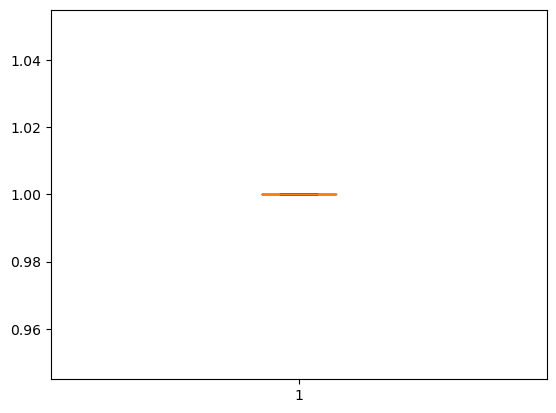

In [83]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set is 1 recall.
* Let's check the performance on testing data.

In [84]:
# Calculating different metrics on validation set
log_reg_model_test_perf = model_performance_classification_sklearn(lr, X_test, y_test)
print("Testing performance:")
log_reg_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.8,1.0,0.8,0.888889


* Performance on testing set is 1.0 recall.

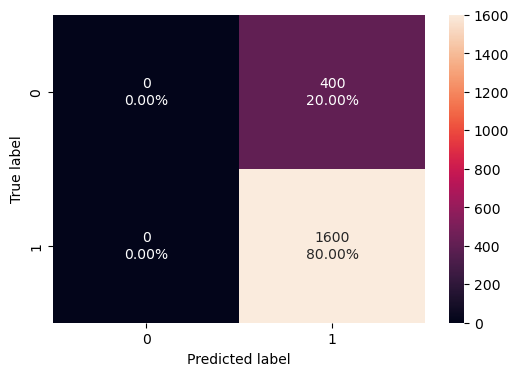

In [85]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_test, y_test)

* Logistic Regression has given a generalized performance on the training and testing set.


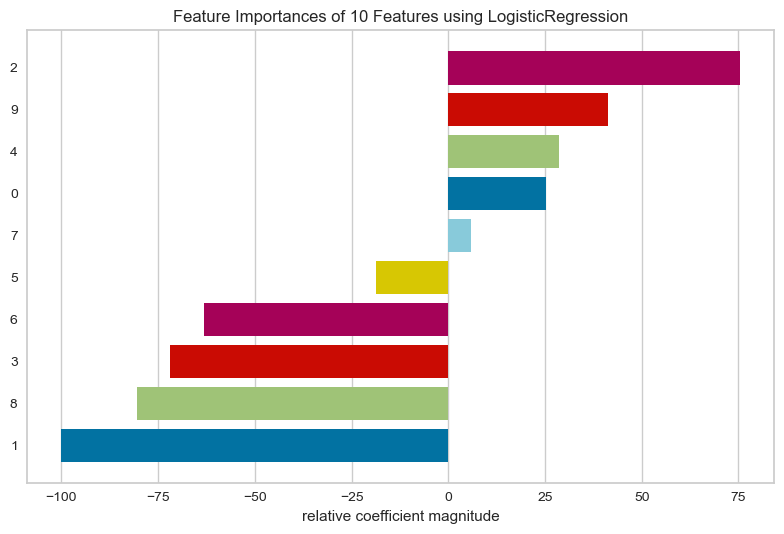

FeatureImportances(ax=<Axes: title={'center': 'Feature Importances of 10 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>,
                   estimator=LogisticRegression(random_state=1))

In [86]:
from sklearn.linear_model import LogisticRegression

# from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import feature_importances
from sklearn.datasets import make_classification

# define dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1
)

# Use the quick method and immediately show the figure
feature_importances(LogisticRegression(random_state=1), X, y)

## Decision Tree

In [87]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [88]:
# Calculating different metrics on train set
d_tree_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train, y_train
)
print("Training performance:")
d_tree_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


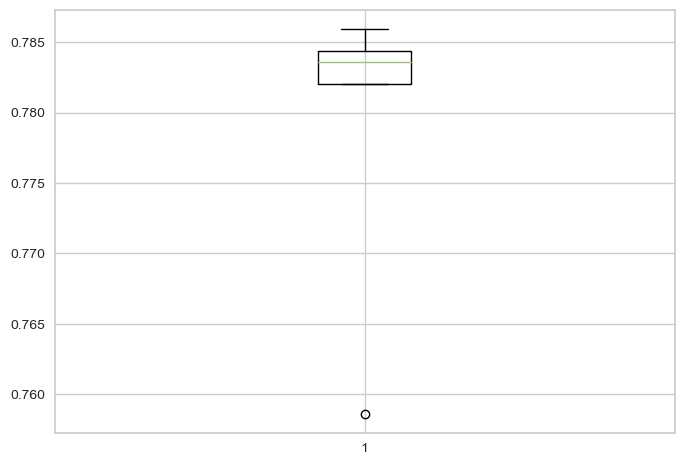

In [89]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=d_tree, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.785 to 0.789 recall.
* Let's check the performance on testing data.

In [90]:
# Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_test, y_test)

DecisionTreeClassifier(random_state=1)

In [91]:
# Calculating different metrics on validation set
d_tree_model_test_perf = model_performance_classification_sklearn(
    d_tree, X_test, y_test
)
print("Testing performance:")
d_tree_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Performance on testing set is 1.0 recall.

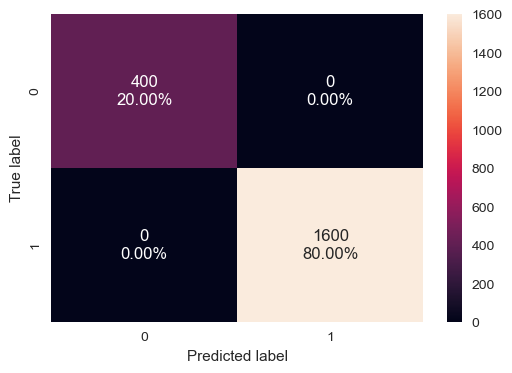

In [92]:
# creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

* Decision Tree has given a generalized performance on the training and testing set.

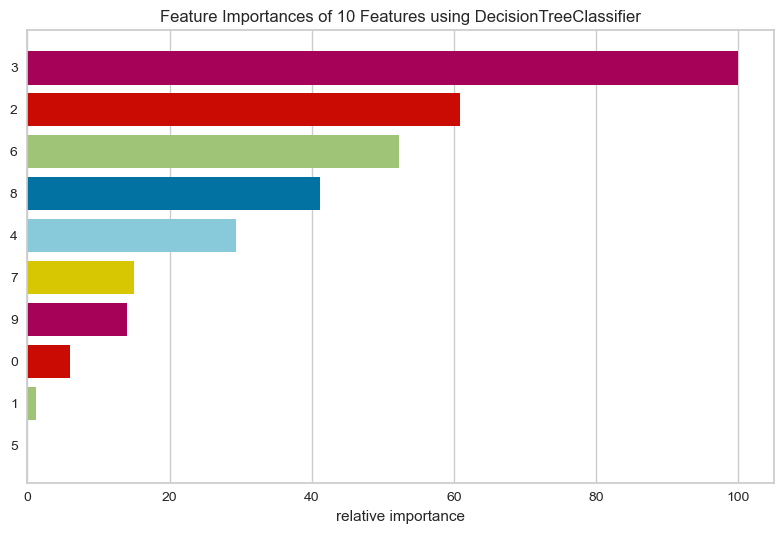

FeatureImportances(ax=<Axes: title={'center': 'Feature Importances of 10 Features using DecisionTreeClassifier'}, xlabel='relative importance'>,
                   estimator=DecisionTreeClassifier())

In [93]:
from sklearn.tree import DecisionTreeClassifier

# from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import feature_importances

# define dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1
)

# Use the quick method and immediately show the figure
feature_importances(DecisionTreeClassifier(), X, y)

## Random Forest

In [94]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [95]:
# Calculating different metrics on train set
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:")
rf_estimator_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


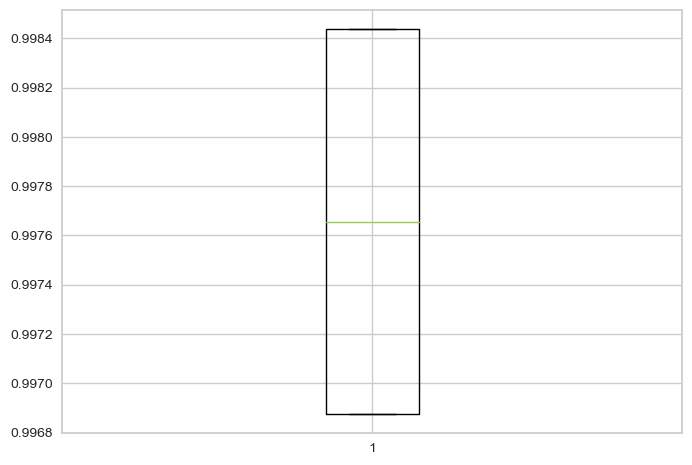

In [96]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=rf_estimator, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.997 to 0.998 recall.
* Let's check the performance on testing data.

In [97]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_test, y_test)

RandomForestClassifier(random_state=1)

In [98]:
# Calculating different metrics on validation set
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    d_tree, X_test, y_test
)
print("Testing performance:")
rf_estimator_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Performance on testing set is 1.0 recall.

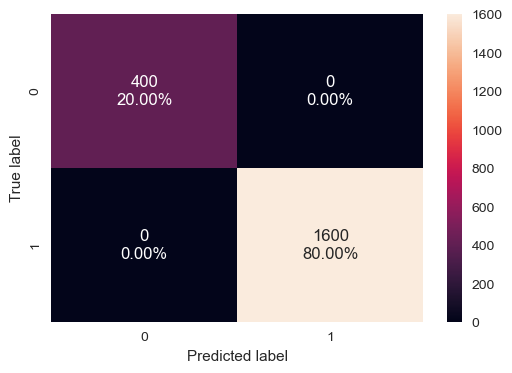

In [99]:
# creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

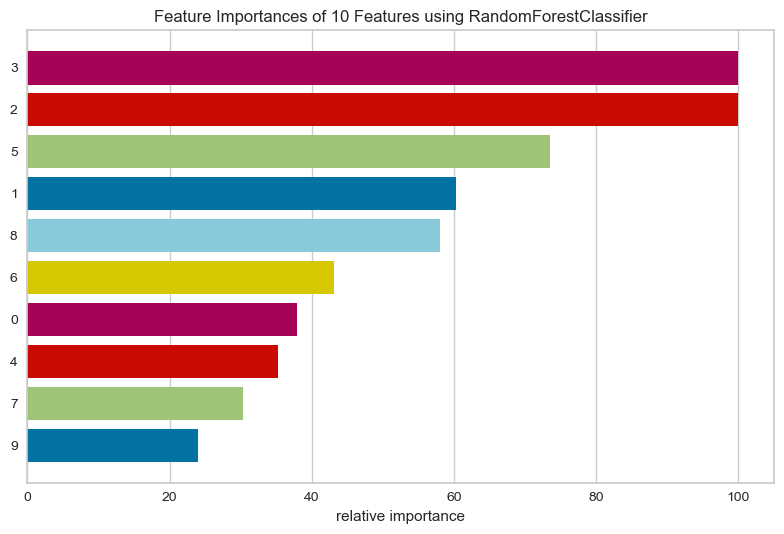

<Axes: title={'center': 'Feature Importances of 10 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [100]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances


# define dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1
)

# define the model
model = RandomForestClassifier(n_estimators=10)

viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()


## Bagging Classifier

In [101]:
# Fitting the model
bagging_estimator = BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [102]:
# Calculating different metrics on train set
bagging_estimator_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator, X_train, y_train
)
print("Training performance:")
bagging_estimator_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.991625,0.999062,0.99055,0.994788


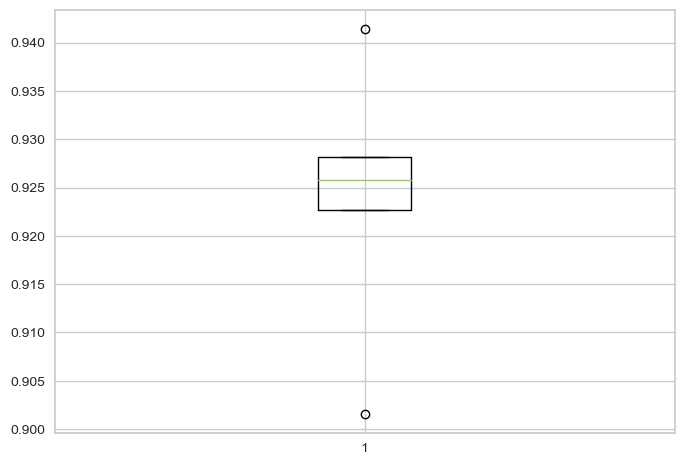

In [103]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=bagging_estimator, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.925 to 0.928 recall.
* Let's check the performance on testing data.

In [104]:
# Fitting the model
bagging_estimator = BaggingClassifier(random_state=1)
bagging_estimator.fit(X_test, y_test)

BaggingClassifier(random_state=1)

In [105]:
# Calculating different metrics on validation set
bagging_estimator_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator, X_test, y_test
)
print("Testing performance:")
bagging_estimator_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.9915,0.99875,0.990701,0.994709


* Performance on testingg set varies between 0.998 to 0.928 recall.

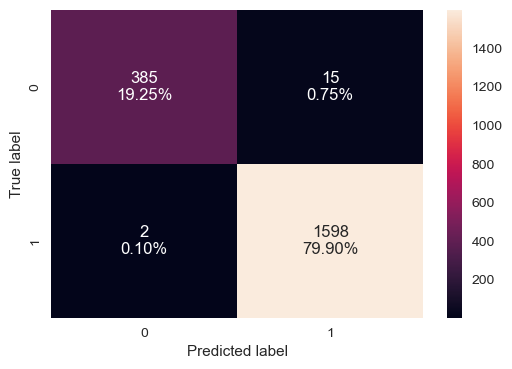

In [106]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_estimator, X_test, y_test)

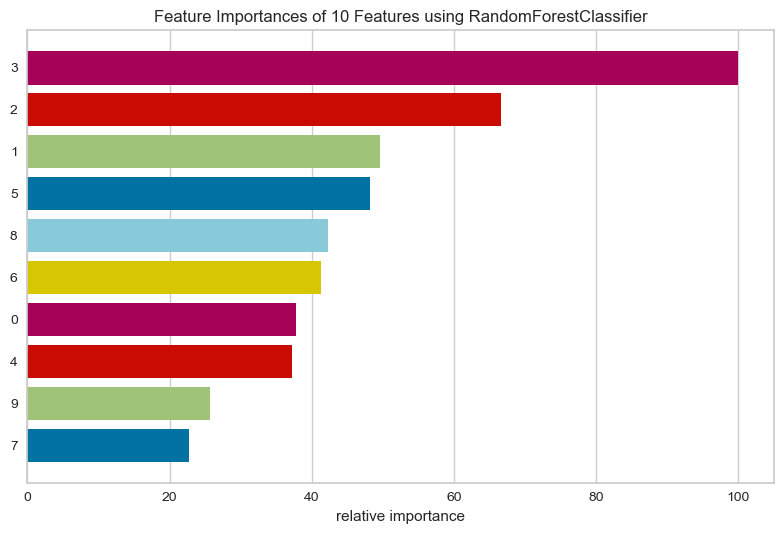

<Axes: title={'center': 'Feature Importances of 10 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [107]:
from sklearn.ensemble import BaggingClassifier
from yellowbrick.model_selection import FeatureImportances


# define dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1
)

# define the model
model = RandomForestClassifier(n_estimators=10)

viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()


## AdaBoost Classifier

In [108]:
# Fitting the model
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [109]:
# Calculating different metrics on train set
abc_model_train_perf = model_performance_classification_sklearn(abc, X_train, y_train)
print("Training performance:")
abc_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.800875,0.99875,0.801304,0.889198


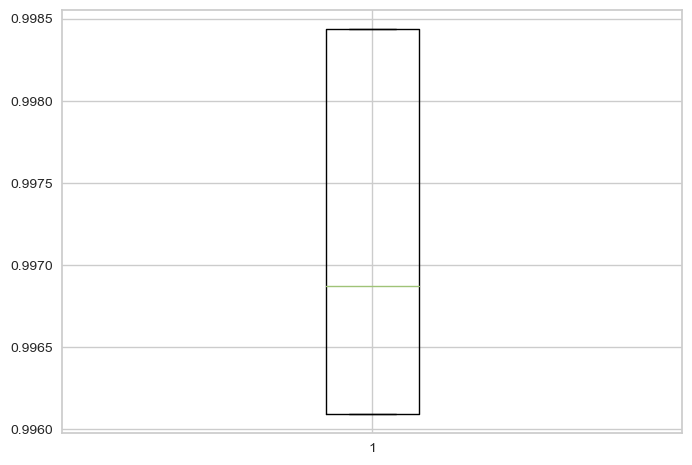

In [110]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=abc, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.996 to 0.998 recall.
* Let's check the performance on testing data.

In [111]:
# Fitting the model
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_test, y_test)

AdaBoostClassifier(random_state=1)

In [112]:
# Calculating different metrics on validation set
abc_model_test_perf = model_performance_classification_sklearn(abc, X_test, y_test)
print("Testing performance:")
abc_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.802,0.994375,0.804348,0.889324


* Performance on testingg set varies between 0.994 to 0.996 recall.

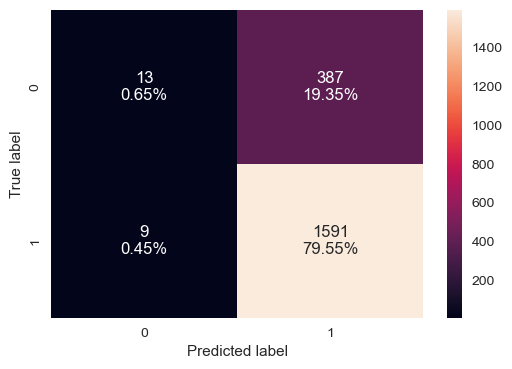

In [113]:
# creating confusion matrix
confusion_matrix_sklearn(abc, X_test, y_test)

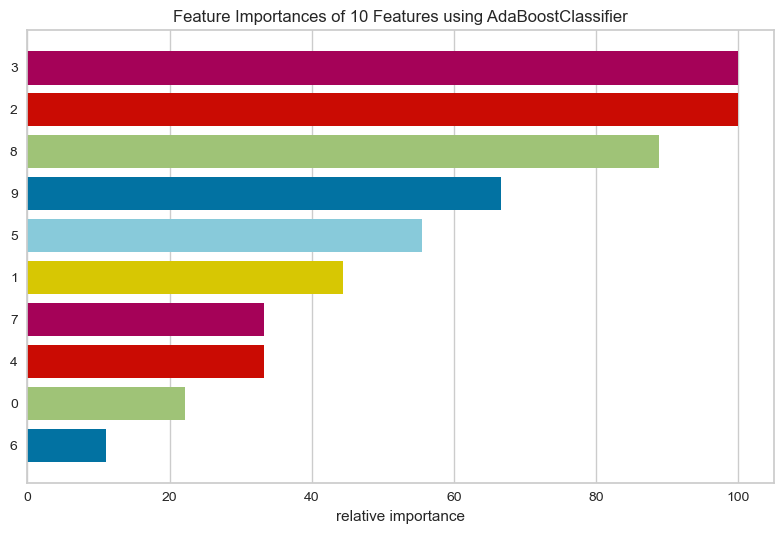

FeatureImportances(ax=<Axes: title={'center': 'Feature Importances of 10 Features using AdaBoostClassifier'}, xlabel='relative importance'>,
                   estimator=AdaBoostClassifier())

In [114]:
from sklearn.ensemble import AdaBoostClassifier

# from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import feature_importances

# define dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1
)

# Use the quick method and immediately show the figure
feature_importances(AdaBoostClassifier(), X, y)

## Gradient Boosting Classifier

In [115]:
# Fitting the model
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [116]:
# Calculating different metrics on train set
gbc_model_train_perf = model_performance_classification_sklearn(abc, X_train, y_train)
print("Training performance:")
gbc_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.792625,0.986094,0.800787,0.883832


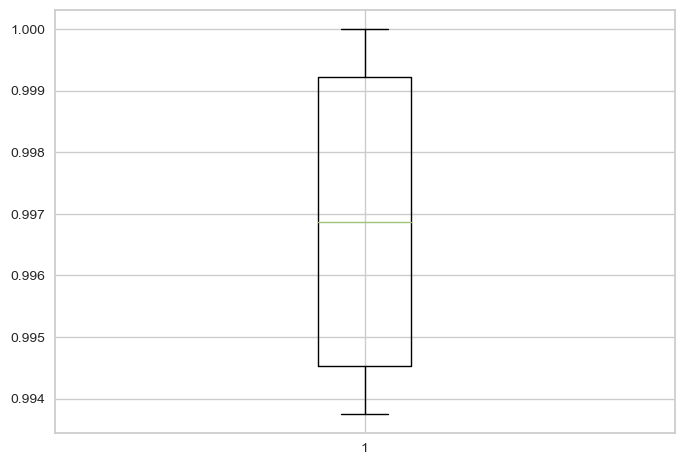

In [117]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=gbc, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.994 to 0.999 recall.
* Let's check the performance on testing data.

In [118]:
# Fitting the model
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_test, y_test)

GradientBoostingClassifier(random_state=1)

In [119]:
# Calculating different metrics on validation set
gbc_model_test_perf = model_performance_classification_sklearn(abc, X_test, y_test)
print("Testing performance:")
gbc_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.802,0.994375,0.804348,0.889324


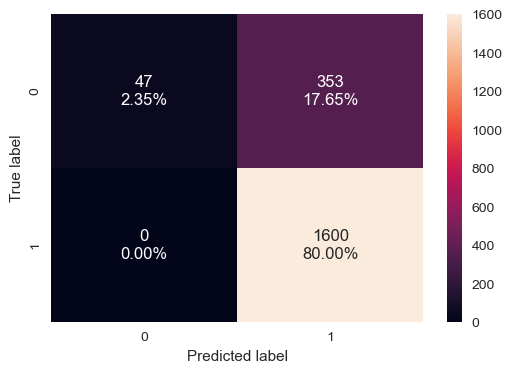

In [120]:
# creating confusion matrix
confusion_matrix_sklearn(gbc, X_test, y_test)

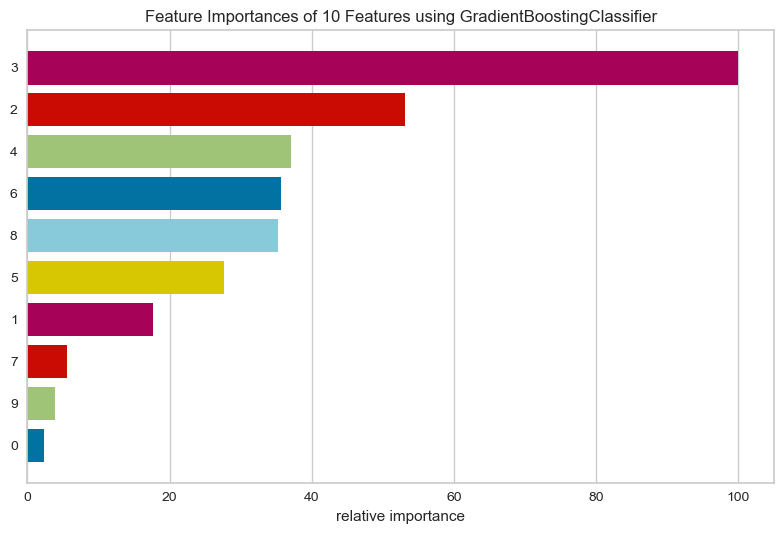

FeatureImportances(ax=<Axes: title={'center': 'Feature Importances of 10 Features using GradientBoostingClassifier'}, xlabel='relative importance'>,
                   estimator=GradientBoostingClassifier())

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

# from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import feature_importances

# define dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1
)

# Use the quick method and immediately show the figure
feature_importances(GradientBoostingClassifier(), X, y)

## XGBoost Classifier

In [122]:
# Fitting the model
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [123]:
# Calculating different metrics on train set
xgb_model_train_perf = model_performance_classification_sklearn(xgb, X_train, y_train)
print("Training performance:")
xgb_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.948875,1.0,0.939932,0.969036


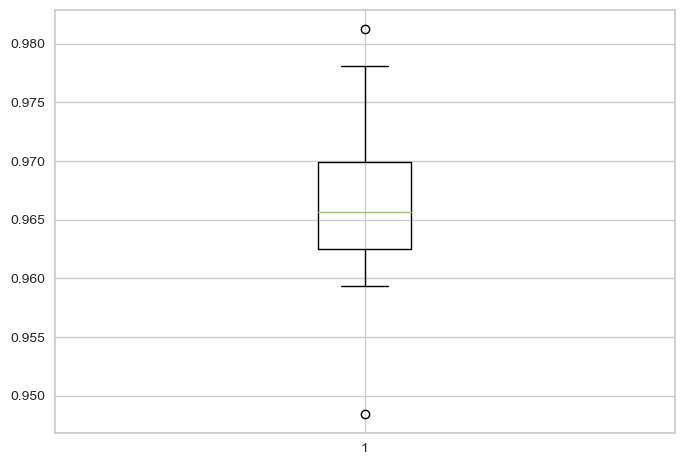

In [124]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=10, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=xgb, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.58 to 0.72 recall.
* Let's check the performance on validation data.

In [125]:
# Fitting the model
xgb = XGBClassifier(random_state=1,eval_metric='auc')
xgb.fit(X_test, y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [126]:
# Calculating different metrics on validation set
xgb_model_test_perf = model_performance_classification_sklearn(xgb, X_test, y_test)
print("Testing performance:")
xgb_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


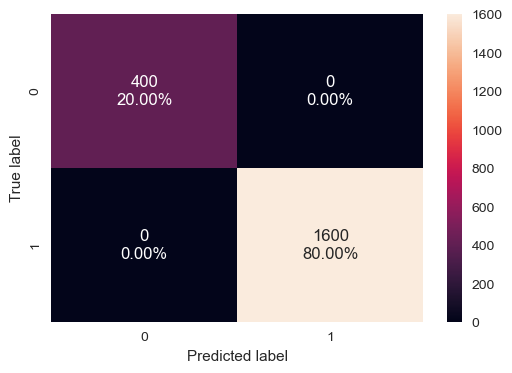

In [127]:
# creating confusion matrix
confusion_matrix_sklearn(xgb, X_test, y_test)

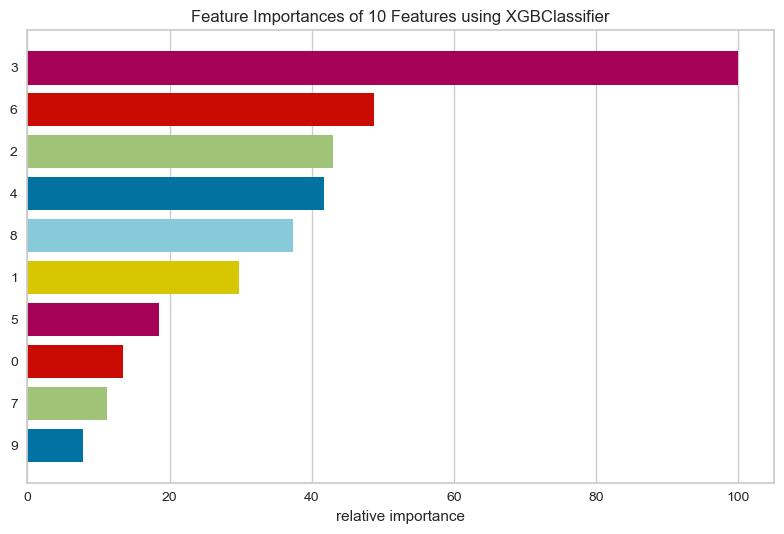

FeatureImportances(ax=<Axes: title={'center': 'Feature Importances of 10 Features using XGBClassifier'}, xlabel='relative importance'>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feat...,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=1, ...))

In [128]:
from xgboost import XGBClassifier
from yellowbrick.model_selection import feature_importances

# define dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1
)

# Use the quick method and immediately show the figure
feature_importances(XGBClassifier(random_state=1, eval_metric="logloss"), X, y)

## Comparing all models till now

In [129]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        d_tree_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        bagging_estimator_model_train_perf.T,
        abc_model_train_perf.T,
        gbc_model_train_perf.T,
        xgb_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic regression",
    "Decision Tree",
    "Random Forest",
    "Bagging",
    "AdaBoost",
    "GradientBoost",
    "XGBoost",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic regression,Decision Tree,Random Forest,Bagging,AdaBoost,GradientBoost,XGBoost
Accuracy,0.800000,1.0,1.0,0.991625,0.800875,0.792625,0.948875
Recall,1.000000,1.0,1.0,0.999062,0.998750,0.986094,1.000000
Precision,0.800000,1.0,1.0,0.990550,0.801304,0.800787,0.939932
F1,0.888889,1.0,1.0,0.994788,0.889198,0.883832,0.969036


In [130]:
# Testing performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        d_tree_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        bagging_estimator_model_test_perf.T,
        abc_model_test_perf.T,
        gbc_model_test_perf.T,
        xgb_model_test_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "Bagging",
    "AdaBoost",
    "GradientBoost",
    "XGBoost",
]
print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


,Logistic Regression,Decision Tree,Random Forest,Bagging,AdaBoost,GradientBoost,XGBoost
Accuracy,0.800000,1.0,1.0,0.991500,0.802000,0.802000,1.0
Recall,1.000000,1.0,1.0,0.998750,0.994375,0.994375,1.0
Precision,0.800000,1.0,1.0,0.990701,0.804348,0.804348,1.0
F1,0.888889,1.0,1.0,0.994709,0.889324,0.889324,1.0


### Observations 
* Low recall values observed in training performance  while recall values are improved in validation performance. 
* We can see from the above analysis the recall values of Decision Tree and Random Forest Models observed high as compared to remaining models. 

## Model comparisons (confusion matrix, ROC, AUC whichever is applicable)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

## Model Building with original data.

In [131]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(
    ("Logistic Regression", LogisticRegression(random_state=1, solver="saga"))
)
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Testing Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_test, model.predict(X_test)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic Regression: 100.0
Bagging: 92.390625
Random forest: 99.765625
GBM: 99.6875
Adaboost: 99.71875000000001
Xgboost: 96.390625
dtree: 77.89062499999999

Testing Performance:

Logistic Regression: 100.0
Bagging: 93.125
Random forest: 99.875
GBM: 99.8125
Adaboost: 99.625
Xgboost: 96.9375
dtree: 76.6875


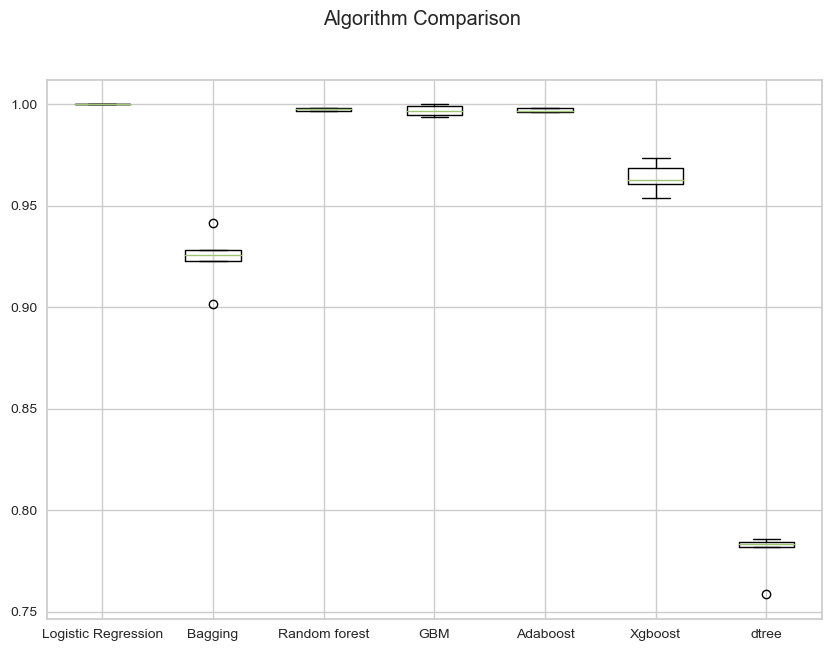

In [132]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [133]:
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=1
)

# Train a bagging classifier with logistic regression base estimator
bagging = BaggingClassifier(
    LogisticRegression(max_iter=1000), n_estimators=10, random_state=1
)

# Fit the model
bagging.fit(X, y)

# Get feature importance
importance = bagging.estimators_[0].coef_

In [134]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        xgb_model_train_perf.T,
        abc_model_train_perf.T,
        bagging_estimator_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost",
    "AdaBoost",
    "Bagging Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost,AdaBoost,Bagging Classifier
Accuracy,0.948875,0.800875,0.991625
Recall,1.000000,0.998750,0.999062
Precision,0.939932,0.801304,0.990550
F1,0.969036,0.889198,0.994788


In [135]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        xgb_model_test_perf.T,
        abc_model_test_perf.T,
        bagging_estimator_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "XGBoost",
    "AdaBoost",
    "Bagging Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,XGBoost,AdaBoost,Bagging Classifier
Accuracy,1.0,0.802000,0.991500
Recall,1.0,0.994375,0.998750
Precision,1.0,0.804348,0.990701
F1,1.0,0.889324,0.994709


In [136]:
# Let's check the performance on test set
bagging_estimator_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator, X_test, y_test
)
bagging_estimator_model_test_perf


,Accuracy,Recall,Precision,F1
0,0.9915,0.99875,0.990701,0.994709


In [137]:
# Fitting the model
bagging_estimator = BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train, y_train)

BaggingClassifier(random_state=1)

# Makepipeline for simpler pipe

In [138]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler


In [139]:
pipe = make_pipeline( MinMaxScaler(), (SVC())) 
print(" Pipeline steps:\ n{}". format( pipe.steps))

 Pipeline steps:\ n[('minmaxscaler', MinMaxScaler()), ('svc', SVC())]


In [140]:
pipe.fit( X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC())])

In [141]:
print(" Test score: {:.2f}". format( pipe.score( X_test, y_test)))

 Test score: 0.80


In [142]:
from sklearn.pipeline import Pipeline
Model = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        (
            "Bagging",
            BaggingClassifier(
                max_features="sqrt",
                random_state=1,
                max_samples=0.5000000000000001,
                n_estimators=250,
            ),
        ),
    ]
)

In [143]:
# Separating target variable and other variables
X1 = data3.drop(columns="y_yes")
Y1 = data3["y_yes"]

# Since we already have a separate test set, we don't need to divide data into train and test

X1 = data3.drop(columns="y_yes")
Y1 = data3["y_yes"]

In [144]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
pipeline = make_pipeline(StandardScaler(),
                         BaggingClassifier(random_state=1))

bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
#
# Fit the bagging classifier
#
bgclassifier.fit(X_train, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),
      'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))

Model test Score: 0.800,  Model training Score: 0.800


## Let's do some Analysis of False Negatives

In [145]:
bagging_estimator.fit(X_test, y_test)

BaggingClassifier(random_state=1)

In [146]:
# Find out probabilities and predictions on test set
pred = bagging_estimator.predict(X_test)
prob = bagging_estimator.predict_proba(X_test)

In [147]:
# creating a dataframe for the predicted, original and probabilities predicted by model
result = pd.DataFrame(
    np.transpose([y_test, pred, prob[:, 1]]),
    columns=["Original", "Predicted", "Probability"],
)

In [148]:
# Let's add label of FN, FP, TP, TN based on predicted values


def Label(data3):
    if (data3["Predicted"] == 0) & (data3["Original"] == 0):
        return "TN"

    elif (data3["Predicted"] == 1) & (data3["Original"] == 1):
        return "TP"

    elif data3["Predicted"] > data3["Original"]:
        return "FP"

    elif data3["Predicted"] < data3["Original"]:
        return "FN"

In [149]:
result["Label"] = result.apply(Label, axis=1)

In [150]:
# This is the final dataframe, which we can use to see if some pattern exists
result.head()

,Original,Predicted,Probability,Label
0,1.0,1.0,0.9,TP
1,1.0,1.0,0.7,TP
2,1.0,1.0,0.9,TP
3,1.0,1.0,1.0,TP
4,1.0,1.0,1.0,TP


In [151]:
# With the threshold being 0.50, there could be some point near to the threshold which could be misclassified by the model
# but they could be later analyzed by the team to decide if we can take a call on those samples

result[(result["Probability"] > 0.45) & (result["Probability"] < 0.5)][
    "Label"
].value_counts()

Series([], Name: count, dtype: int64)

In [152]:
# DummyClassifier to predict only target 0
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))


Unique predicted labels:  [1]
Test score:  0.8


In [153]:
# as per above results, xgboost gives best result and hence selecting same to model building...
model = BaggingClassifier()
model.fit(X_train, y_train)

BaggingClassifier()

In [154]:
# Calculating different metrics on validation set
bagging_estimator_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator, X_test, y_test
)
print("Test performance:")
bagging_estimator_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.9915,0.99875,0.990701,0.994709


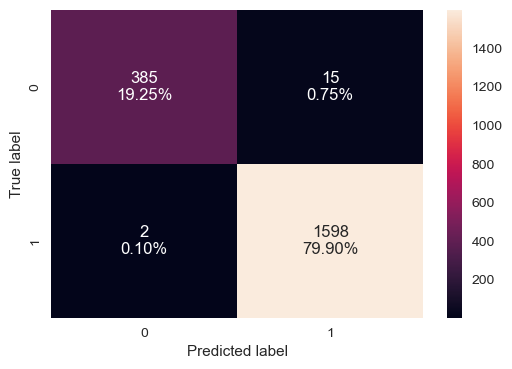

In [155]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_estimator, X_test, y_test)

The confusion matrix

True Positives (TP): we correctly predicted that the customers subscribe to a term deposit are 385 
    
True Negatives (TN): we correctly predicted that  the customers not subscribe to a term deposit 1598

False Positives (FP): we incorrectly predicted that the customers subscribe to a term deposit (a "Type I error") 2 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that the customers don't subscribe to a term deposit (a "Type II error") 15 Falsely predict negative Type II error

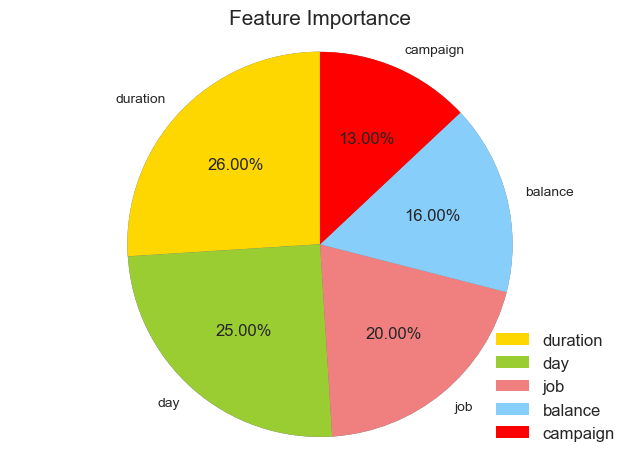

In [156]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["duration", "day", "job", "balance", "campaign"]
colors = ['gold','yellowgreen','lightcoral','lightskyblue','red']
sizes = [26, 25, 20, 16, 13]
explode = [0.1, 0, 0, 0, 0]  # To slice the perticuler section


plt.pie(
    sizes,  # Values
    labels=labels,  # Labels for each sections
    explode=explode,  # To slice the perticuler section
    colors=colors,  # Color of each section
    autopct="%0.2f%%",  # Show data in persentage for with 2 decimal point
    shadow=True,  # Showing shadow of pie chart
    radius=80,  # Radius to increase or decrease the size of pie chart
    startangle=90,  # Start angle of first section
)

# plt.legend() # To show legend
plt.title("Feature Importance", fontsize=15)
plt.legend(labels, loc="lower right", fontsize=12)
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()  # To show pie chart only

In [157]:
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=1
)

# Train a bagging classifier with logistic regression base estimator
bagging = BaggingClassifier(
    LogisticRegression(max_iter=1000), n_estimators=10, random_state=1
)

# Fit the model
bagging.fit(X, y)

BaggingClassifier(estimator=LogisticRegression(max_iter=1000), random_state=1)

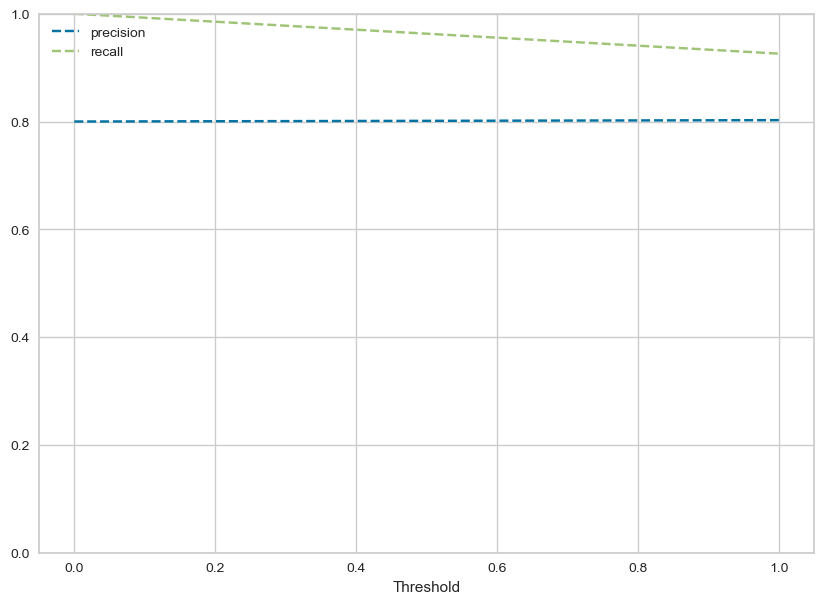

In [158]:
from sklearn.metrics import precision_recall_curve
y_scores = bagging_estimator.predict(X_train)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [162]:
from sklearn.ensemble import BaggingClassifier

dtc_params = {
    "max_features": [0.5, 0.7, 1.0],
    "max_samples": [0.5, 0.7, 1.0],
    "n_estimators": [2, 5, 10, 20],
}

dtc_gs = GridSearchCV(BaggingClassifier(), dtc_params, cv=5, verbose=1)
dtc_gs.fit(X, y)
dtc_best = dtc_gs.best_estimator_

# Got this code from stack overflow. It is what Randomforrest does OOB. Averages the importances from each of
# the ensemble trees.
feature_importances = np.mean(
    [tree.feature_importances_ for tree in dtc_best.estimators_], axis=0
)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [163]:
# evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
# define the dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1
)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1
)
# fit the model
model = BaggingClassifier(solver="liblinear")
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print("Accuracy: %.2f" % (accuracy * 100))

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'solver'

In [164]:
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=1
)

# Train a bagging classifier with logistic regression base estimator
bagging = BaggingClassifier(LogisticRegression(), max_samples=0.5, max_features=0.5) 

# Fit the model
bagging.fit(X, y)

# Get feature importance
# importance = bagging.estimators_[0].coef_

BaggingClassifier(estimator=LogisticRegression(), max_features=0.5,
                  max_samples=0.5)

In [165]:
# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
digit = load_digits()
X, y = digit.data, digit.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create the base classifier
bagging = LogisticRegression()
model = BaggingClassifier(LogisticRegression(), max_samples=0.5, max_features=0.5) 
classifiers = model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9611111111111111


In [166]:
# bagged decision trees on an imbalanced classification problem
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
model = BaggingClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.868


## Observations:
This project can be summarized as follows:

The project involved an analysis conducted in several steps, as outlined below:
  1. Import Libraries and Load Data: Libraries were imported, and the dataset was loaded for analysis.
  2. Data Peprocessing: Data preprocessing steps were performed, which typically include cleaning, handling missing values, and data transformation.
  3. Exploratory Data Analysis (EDA):In this phase, insights were gathered from the data.

**The analysis addressed issues such as an imbalanced data set and categorical features.**

  4. Base Model Creation:  A base model was created using libraries to test multiple machine-learning models.
  5. Feature Importance: The importance of features in predicting the outcome was assessed.
  6. Training the Final Model:  A final model was trained based on the insights gained

**Insights:**
Some key insights obtained during the analysis were:
  - The dataset was clean with no missing, null, or duplicated values.
  - Some clients subscribed with a negative balance, which seems unusual and might be a mistake in the dataset.
  - Clients who defaulted previously or had personal or housing loans were less likely to subscribe to a term deposit.
  - Clients with tertiary education, students, those with cellular contact, those last contacted in October, and single individuals were more likely to subscribe.
  - The duration of the call was the most important feature in predicting whether a client would subscribe.
  - Clients who are interested tend to have longer call durations to learn more about the program.
  - Clients with last call durations of 11 - 35 minutes are more likely to subscribe.
  - The model achieved 90% accuracy in predicting client subscriptions, which can save the company time and money.
  - This summary outlines the steps taken in the project, key insights, and the practical implications of the analysis.

## Conclusion:
The analysis led to the following conclusions:
 
After evaluating seven different models, it is evident that their performance values significantly vary.

**Accuracy:**  The bagging model achieved the highest accuracy value, followed by the Adaboost model, whereas Xgboost, Decision Tree,  and Random forest values were found to be overfitting.  

The comparative analysis has been carried out by using 5-fold cross-validation methodology and the average score was found to be best for the Bagging Classifier model which was found to be 0.99.
   
**Overfitting:** It is important to note that while some models performed well on training data, they exhibited signs of overfitting when tested on the validation or test dataset. This means they may not generalize well to new data.
 
The Bagging Classifier model showed remarkable robustness, performing consistency well across various test scenarios and datasets, making it a strong contender in real-world deployment.
 
**Business Context:** Models that offer interpretability, such as the Bagging classifier model preferred in cases where understanding the model's decision-making process is crucial.

Ultimately, the choice of the best model is a Bagging Classifier and aligning with the given dataset characteristics, and constraints of the project. Further analysis, model finetuning, or ensemble methods could be considered to improve the model’s performance.     
       